# Problem Statement

When it comes to buying and selling a house, homeseekers and homeowners alike are typically most concerned about one factor - that is, the price of the house. However, as houses come in all shapes and sizes, with a myriad of customizable options catering to individual preferences - such as the number of bedrooms; the size of the garage; or even the quality of the fireplace - it is difficult to perform an accurate valuation of a property. 

Nonetheless, developing a price prediction model would be immensely useful for homeseekers and homeowners to be able to estimate the sale value of their properties, allowing them to make better informed decisions. Additionally, knowing which are the specific features of a property that has a strong effect on the sale price also allows home owners to strategically up-value and market their properties.

In addition, real estate agents based in Ames may also have a vested interest in better understanding the factors affecting the current property sale prices, allowing them to identify market trends as well. 

In this project, we examine the Ames, Iowa housing dataset, which contains sale prices from 2006 to 2010 and attempt to develop a **Lasso Regession model** which predicts the price of residential properties in Ames. The model will be evaluated using the **Root Mean Squared Error (RSME)** metric which describes the average deviation of our predicted prices from the true price of the house. The lower the RMSE compared to our baseline score, the better performing the model.

# Imports and Options

In [1]:
# import relevant libraries and modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set maximum columns and rows to be displayed in dataframes

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [3]:
# set the style of our plots and colour palette

sns.set_theme(style="white", font='sans-serif')
sns.set_palette('BrBG_r', n_colors=10)

# Read Dataset

In [4]:
# read in dataset from .csv file

ames = pd.read_csv('../datasets/train.csv')

# Exploratory Data Analysis

We first examine basic properties of the Ames dataset, including its shape, feature data types, and the presence of null values.

In [5]:
ames.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [6]:
ames.shape

(2051, 81)

The dataset has 2051 rows and 81 features.

In [7]:
# examine the dtypes, column names and number of null values

ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
# remove space from column names

ames.rename(columns=lambda col_name: col_name.replace(' ', ''), inplace=True)

In [9]:
# check that space has been successfully removed

ames.head()

Id        PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0  109  533352170          60       RL          NaN    13517   Pave   NaN   
1  544  531379050          60       RL         43.0    11492   Pave   NaN   
2  153  535304180          20       RL         68.0     7922   Pave   NaN   
3  318  916386060          60       RL         73.0     9802   Pave   NaN   
4  255  906425045          50       RL         82.0    14235   Pave   NaN   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      IR1         Lvl    AllPub   CulDSac       Gtl       Sawyer       RRAe   
1      IR1         Lvl    AllPub   CulDSac       Gtl      SawyerW       Norm   
2      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
3      Reg         Lvl    AllPub    Inside       Gtl       Timber       Norm   
4      IR1         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            6            8       1976   
1       Norm     1Fam     2Story            7            5       1996   
2       Norm     1Fam     1Story            5            7       1953   
3       Norm     1Fam     2Story            5            5       2006   
4       Norm     1Fam     1.5Fin            6            8       1900   

   YearRemod/Add RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2005     Gable  CompShg     HdBoard     Plywood    BrkFace   
1           1997     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           2007     Gable  CompShg     VinylSd     VinylSd       None   
3           2007     Gable  CompShg     VinylSd     VinylSd       None   
4           1993     Gable  CompShg     Wd Sdng     Plywood       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       289.0        Gd        TA     CBlock       TA       TA           No   
1       132.0        Gd        TA      PConc       Gd       TA           No   
2         0.0        TA        Gd     CBlock       TA       TA           No   
3         0.0        TA        TA      PConc       Gd       TA           No   
4         0.0        TA        TA      PConc       Fa       Gd           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       533.0          Unf         0.0      192.0        725.0   
1          GLQ       637.0          Unf         0.0      276.0        913.0   
2          GLQ       731.0          Unf         0.0      326.0       1057.0   
3          Unf         0.0          Unf         0.0      384.0        384.0   
4          Unf         0.0          Unf         0.0      676.0        676.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       725       754             0   
1    GasA        Ex          Y      SBrkr       913      1209             0   
2    GasA        TA          Y      SBrkr      1057         0             0   
3    GasA        Gd          Y      SBrkr       744       700             0   
4    GasA        TA          Y      SBrkr       831       614             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1479           0.0           0.0         2         1             3   
1       2122           1.0           0.0         2         1             4   
2       1057           1.0           0.0         1         0             3   
3       1444           0.0           0.0         2         1             3   
4       1445           0.0           0.0         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             6        Typ           0         NaN   
1             1          Gd             8        Typ           1          TA   
2             1          Gd             5 

In [10]:
ames.describe()

# summary of the distribution for numeric features

Id           PID   MSSubClass  LotFrontage        LotArea  \
count  2051.000000  2.051000e+03  2051.000000  1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776    69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223    23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000    21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000    58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000    68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000    80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000   313.000000  159000.000000   

       OverallQual  OverallCond    YearBuilt  YearRemod/Add   MasVnrArea  \
count  2051.000000  2051.000000  2051.000000    2051.000000  2029.000000   
mean      6.112140     5.562165  1971.708922    1984.190151    99.695909   
std       1.426271     1.104497    30.177889      21.036250   174.963129   
min       1.000000     1.000000  1872.000000    1950.000000     0.000000   
25%       5.000000     5.000000  1953.500000    1964.500000     0.000000   
50%       6.000000     5.000000  1974.000000    1993.000000     0.000000   
75%       7.000000     6.000000  2001.000000    2004.000000   161.000000   
max      10.000000     9.000000  2010.000000    2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  2050.000000  2050.000000  2050.000000  2050.000000  2051.000000   
mean    442.300488    47.959024   567.728293  1057.987805  1164.488055   
std     461.204124   165.000901   444.954786   449.410704   396.446923   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   220.000000   793.000000   879.500000   
50%     368.000000     0.000000   474.500000   994.500000  1093.000000   
75%     733.750000     0.000000   811.000000  1318.750000  1405.000000   
max    5644.000000  1474.000000  2336.000000  6110.000000  5095.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  2051.000000   2051.000000  2051.000000   2049.000000   2049.000000   
mean    329.329108      5.512921  1499.330083      0.427526      0.063446   
std     425.671046     51.068870   500.447829      0.522673      0.251705   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.000000      0.000000      0.000000   
50%       0.000000      0.000000  1444.000000      0.000000      0.000000   
75%     692.500000      0.000000  1728.500000      1.000000      0.000000   
max    1862.000000   1064.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  2051.000000  2051.000000   2051.000000   2051.000000   2051.000000   
mean      1.577279     0.371039      2.843491      1.042906      6.435885   
std       0.549279     0.501043      0.826618      0.209790      1.560225   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       4.000000     2.000000      8.000000      3.000000     15.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  2051.000000  1937.000000  2050.000000  2050.000000  2051.000000   
mean      0.590931  1978.707796     1.776585   473.671707    93.833740   
std       0.638516    25.441094     0.764537   215.934561   128.549416   
min       0.000000  1895.000000     0.000000     0.000000     0.000000   
25%       0.000000  1961.000000     1.000000   319.000000     0.000000   
50%       1.000000  1980.000000     2.000000   480.000000     0.000000   
75%       1.000000  2002.000000     2.000000   576.000000   168.

In [11]:
# show all features with null values

ames.isnull().sum().sort_values(ascending=False)[ames.isnull().sum().sort_values(ascending=False) > 0]

# note: null values may not imply actual missing values, but rather that the feature is not present

PoolQC          2042
MiscFeature     1986
Alley           1911
Fence           1651
FireplaceQu     1000
LotFrontage      330
GarageFinish     114
GarageCond       114
GarageQual       114
GarageYrBlt      114
GarageType       113
BsmtExposure      58
BsmtFinType2      56
BsmtFinType1      55
BsmtCond          55
BsmtQual          55
MasVnrType        22
MasVnrArea        22
BsmtHalfBath       2
BsmtFullBath       2
GarageCars         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF2         1
TotalBsmtSF        1
BsmtFinSF1         1
dtype: int64

A majority of the columns with null values are categorical variables. Numerical columns that contain missing values include `LotFrontage`, `GarageYrBlt`, `MasVnrArea`, etc.

## Description of Variables

In [12]:
# look through all the int64 features
ames.select_dtypes(include='int64').head()

Id        PID  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0  109  533352170          60    13517            6            8       1976   
1  544  531379050          60    11492            7            5       1996   
2  153  535304180          20     7922            5            7       1953   
3  318  916386060          60     9802            5            5       2006   
4  255  906425045          50    14235            6            8       1900   

   YearRemod/Add  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  FullBath  \
0           2005       725       754             0       1479         2   
1           1997       913      1209             0       2122         2   
2           2007      1057         0             0       1057         1   
3           2007       744       700             0       1444         2   
4           1993       831       614             0       1445         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  WoodDeckSF  \
0         1             3             1             6           0           0   
1         1             4             1             8           1           0   
2         0             3             1             5           0           0   
3         1             3             1             7           0         100   
4         0             3             1             6           0           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           44              0          0            0         0        0   
1           74              0          0            0         0        0   
2           52              0          0            0         0        0   
3            0              0          0            0         0        0   
4           59              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       3    2010     130500  
1       4    2009     220000  
2       1    2010     109000  
3       4    2010     174000  
4       3    2010     138500

- `Id` and `PID` are ID fields and do not have any numerical meaning to them. These can be dropped.

- `MSSubClass` is in fact a nominal categorical feature.

- `YearBuilt`, `YearRemod/Add`, `YrSold` should be engineered to create new features (e.g. age of the house, number of years since remod). 

- `MoSold` is a discrete numerical variable which refers to the month that the house was sold in. This should be treated as a categorical feature since the month is cyclical.

- `SalePrice` is our target variable.

In [13]:
# look through all the float64 features
ames.select_dtypes(include='float64').head()

LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          NaN       289.0       533.0         0.0      192.0        725.0   
1         43.0       132.0       637.0         0.0      276.0        913.0   
2         68.0         0.0       731.0         0.0      326.0       1057.0   
3         73.0         0.0         0.0         0.0      384.0        384.0   
4         82.0         0.0         0.0         0.0      676.0        676.0   

   BsmtFullBath  BsmtHalfBath  GarageYrBlt  GarageCars  GarageArea  
0           0.0           0.0       1976.0         2.0       475.0  
1           1.0           0.0       1997.0         2.0       559.0  
2           1.0           0.0       1953.0         1.0       246.0  
3           0.0           0.0       2007.0         2.0       400.0  
4           0.0           0.0       1957.0         2.0       484.0

- Several of the features (e.g. `GarageYrBlt`, `GarageCars`, `BsmtFullBath`, `BsmtHalfBath`) should be of type `int`, but this is not a big issue. This is likely due to the presence of null values (which causes the column to be of type `float`.

In [14]:
# look through all the object features
ames.select_dtypes(include='object').head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
2       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0       Sawyer       RRAe       Norm     1Fam     2Story     Gable  CompShg   
1      SawyerW       Norm       Norm     1Fam     2Story     Gable  CompShg   
2        NAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   
3       Timber       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      SawyerW       Norm       Norm     1Fam     1.5Fin     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     HdBoard     Plywood    BrkFace        Gd        TA     CBlock       TA   
1     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
2     VinylSd     VinylSd       None        TA        Gd     CBlock       TA   
3     VinylSd     VinylSd       None        TA        TA      PConc       Gd   
4     Wd Sdng     Plywood       None        TA        TA      PConc       Fa   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           No          GLQ          Unf    GasA        Ex   
2       TA           No          GLQ          Unf    GasA        TA   
3       TA           No          Unf          Unf    GasA        Gd   
4       Gd           No          Unf          Unf    GasA        TA   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          Gd        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ         NaN     Detchd   
3          Y      SBrkr          TA        Typ         NaN    BuiltIn   
4          Y      SBrkr          TA        Typ         NaN     Detchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          Unf         TA         TA          Y    NaN   NaN         NaN   
3          Fin         TA         TA          Y    NaN   NaN         NaN   
4          Unf         TA         TA          N    NaN   NaN         NaN   

  SaleType  
0      WD   
1      WD   
2      WD   
3      WD   
4      WD

A large number of the variables are ordinal categorical variables - these include:
- `LotShape`
- `Utilities`
- `LandSlope`
- `OverallQual`
- `OverallCond`
- `ExterQual`
- `ExterCond`
- `BsmtQual`
- `BsmtCond`
- `BsmtExposure`
- `BsmtFinType1`
- `BsmtFinType2`
- `HeatingQC`
- `Electrical`
- `KitchenQual`
- `Functional`
- `FireplaceQu`
- `GarageFinish`
- `GarageQual`
- `GarageCond`
- `PavedDrive`
- `PoolQC`
- `Fence`

There are 23 ordinal categorical variables in total.

## Examining Null Values

We first define two functions:
1. Function to plot a box plot and histogram to visualize the distribution of categorical features.
2. Function to plot a scatter plot to visualize the distribution of numerical features.

In [15]:
def plot_boxandhist(dataframe, column_name, categorical_cols):
    """ 
    This function plots box plots for a given column name, split by the various categories of another column(s) of the dataframe.
    It also plots the histogram for the categorical column itself.
    """    
    nrows = 2*len(categorical_cols)
    fig, ax = plt.subplots(nrows=2*len(categorical_cols), figsize=(10, 7*nrows))   
    ax = ax.ravel()
        
    for i, categorical_col in enumerate(categorical_cols):
    
        sns.boxplot(y=dataframe[column_name], x=dataframe[categorical_col], width=0.5, ax=ax[2*i])
        sns.countplot(x=dataframe[categorical_col], linewidth=1.5, edgecolor='black', ax=ax[2*i+1])

        ax[2*i].set_title(f'Boxplot of {column_name} against {categorical_col}', fontsize=20)
        ax[2*i].set_xlabel(categorical_col, fontsize=15)
        ax[2*i].set_ylabel(column_name, fontsize=15)
        ax[2*i+1].set_title(f'Histogram of {categorical_col}', fontsize=20)
        ax[2*i+1].set_xlabel(categorical_col, fontsize=15)
        ax[2*i+1].set_ylabel('Count', fontsize=15)
        
        if dataframe[categorical_col].nunique() > 10:
            for label in ax[2*i].get_xticklabels():
                label.set_rotation(90) 
            for label in ax[2*i+1].get_xticklabels():
                label.set_rotation(90)
                
    fig.tight_layout()

In [16]:
def plot_scatter(dataframe, column_name, numeric_cols):
    """ 
    This function plots a scatter plot for the target variable, column_name against a list of numeric features, numeric_cols.
    """
    
    nrows = len(numeric_cols)
    
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(8, 8*nrows))
    
    if nrows != 1:
        ax = ax.ravel()
            
        for i, numeric_col in enumerate(numeric_cols):
            sns.scatterplot(x=dataframe[numeric_col], y=dataframe[column_name], ax=ax[i])
            ax[i].set_title(f'Scatter plot of {column_name} against {numeric_col}', fontsize=20)
            ax[i].set_xlabel(numeric_col, fontsize=15)
            ax[i].set_ylabel(column_name, fontsize=15)
    
    else:
        sns.regplot(x=dataframe[numeric_cols[0]], y=dataframe[column_name])
        ax.set_title(f'Scatter plot of {column_name} against {numeric_cols[0]}', fontsize=20)
        ax.set_xlabel(numeric_cols[0], fontsize=15)
        ax.set_ylabel(column_name, fontsize=15)

    fig.tight_layout()

### Visualizing categorical columns with null values

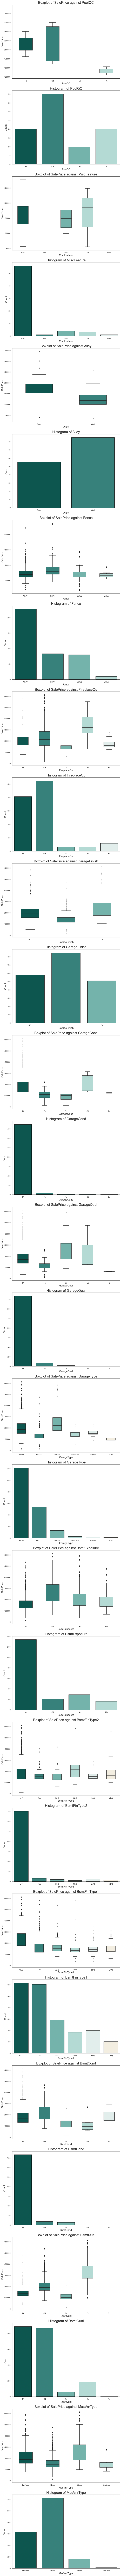

In [17]:
plot_boxandhist(ames, 'SalePrice', ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                                    'GarageFinish', 'GarageCond', 'GarageQual', 'GarageType',
                                    'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond',
                                    'BsmtQual', 'MasVnrType'])

**Observations**

- For `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`, `GarageFinish`, `GarageCond`, `GarageQual`, `GarageType`, `BsmtFinType1`, `BsmtFinType2`, `BsmtCond`, `BsmtQual`, `MasVnrType` with NA values, it indicates that the particular house feature linked to the column is not present (i.e. no garage/pool/basement). We can impute these with `'None'`.
- For `BsmtExposure`, we can impute missing values with `No` since this is equivalent.

### Visualizing numerical columns with null values

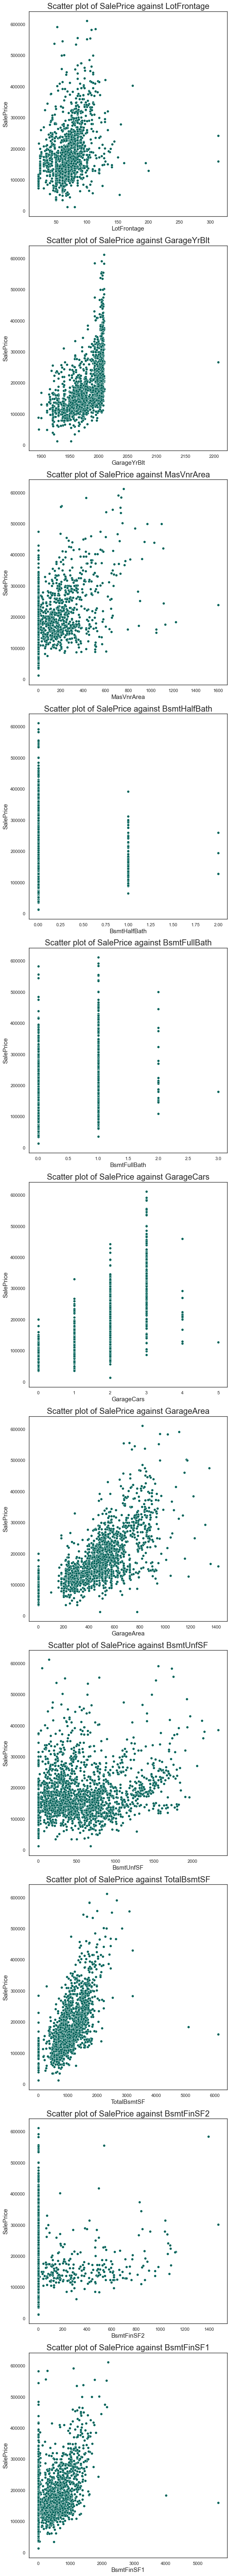

In [18]:
plot_scatter(ames, 'SalePrice', ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 
                                 'BsmtFullBath', 'GarageCars', 'GarageArea', 'BsmtUnfSF', 
                                 'TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1'])

**Observations**

- For `LotFrontage`, this is the linear feet of the street connected to the property. We assume that this is related to the `Neighborhood` that the property is located in, and will impute based on the median value of `LotFrontage` for each neighborhood.
- For `GarageYrBlt`, we can assume that the year built is the same as the `YearBlt` column.
- `MasVnrArea`, `BsmtHalfBath`, `BsmtFullBath`, `GarageCars`, `GarageArea`, `BsmtUnfSF`, `BsmtFinSF1`, `BsmtFinSF2`, `TotalBsmtSF`, `BsmtUnfSF` can be imputed with a value of 0, since it is implied that the respective house features are missing.

## Identifying Outliers

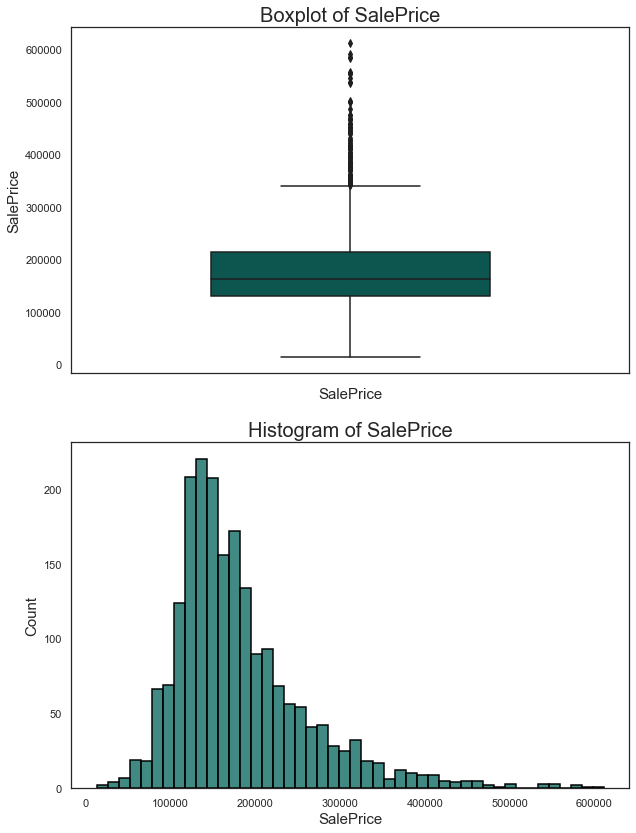

In [19]:
# we first visualize our SalePrice distribution using a box plot and histogram

fig, ax = plt.subplots(nrows=2, figsize=(10, 14))   
ax = ax.ravel()
        
sns.boxplot(y=ames['SalePrice'], width=0.5, ax=ax[0])
sns.histplot(x=ames['SalePrice'], linewidth=1.5, edgecolor='black', ax=ax[1])

ax[0].set_title('Boxplot of SalePrice', fontsize=20)
ax[0].set_xlabel('SalePrice', fontsize=15)
ax[0].set_ylabel('SalePrice', fontsize=15)
ax[1].set_title('Histogram of SalePrice', fontsize=20)
ax[1].set_xlabel('SalePrice', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)

plt.show()

**Observations**

For our target variable `SalePrice`, the distribution looks right-skewed with a relatively long tail. Majority of the houses fall within the 100,000 to 200,000 range. Prices beyond 214,000 fall beyond the 75th percentile of the data.

We will not perform any log transformations to simplify our analysis (such that our eventual R^2 and RMSE values remain easily interpretable) and will assume that `SalePrice` can be appropriately modeled with a linear regression model.

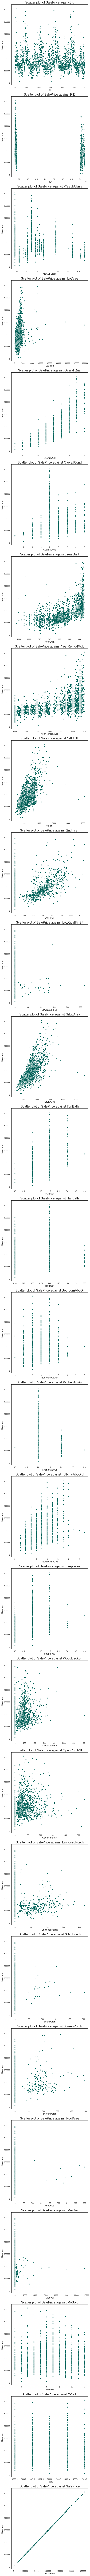

In [20]:
# plot scatter plots for all columns of type int64

plot_scatter(ames, 'SalePrice', ames.select_dtypes(include='int64').columns)

**Observations**

- From the plot of `SalePrice` against `GrLivArea`, there are 2 obvious outliers with `GrLivArea` of more than 4000 sq ft of above ground living area, yet with a disproportionately low sale price. From the data description, it seems that these are simply unusual sales (very large house houses priced relatively appropriately). Given that `GrLivArea` is likely to be one of the stronger predictors (as observed from the relatively linear shape of the data points), we can consider to remove these 2 outliers to obtain a better fit of the data for our linear regression.
- Not many other significant outliers can be observed from rest of the features - while the plot of `LotArea` shows 2 points with extremely large lot areas, the rest of the data points do not exhibit a strong linear trend.

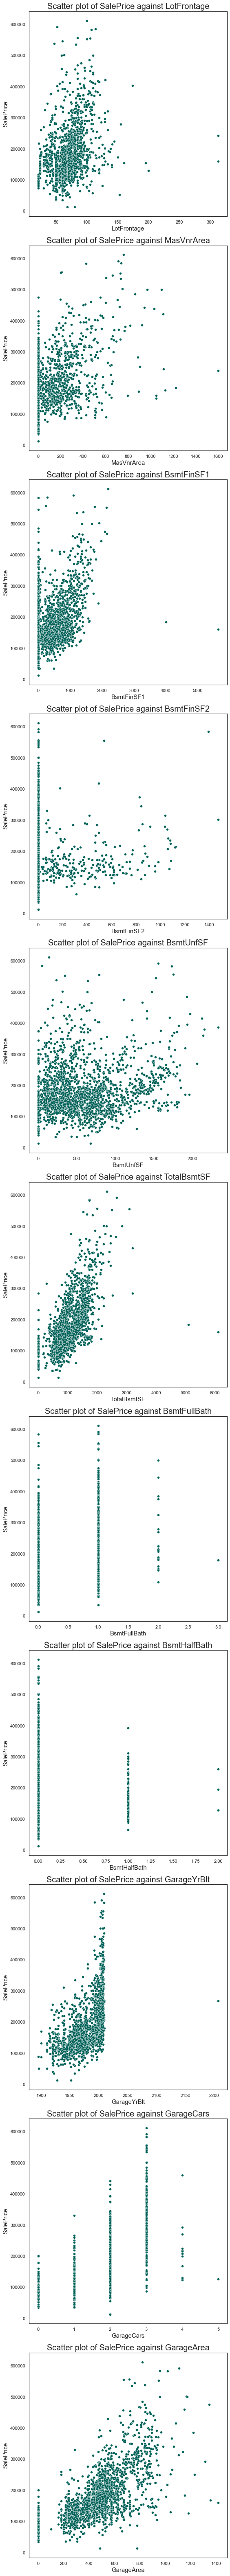

In [21]:
# plot scatter plots for all columns of type int64

plot_scatter(ames, 'SalePrice', ames.select_dtypes(include='float64').columns)

**Observations**

- `GarageYrBlt` has one anomalous point where the year value is > 2200. The value will be imputed with the corresponding `YearBuilt` instead.
- For `TotalBsmtSF`, the two data points that have significantly large basement areas also correspond to the earlier 2 outliers for `GrLivArea`. These will also be removed.



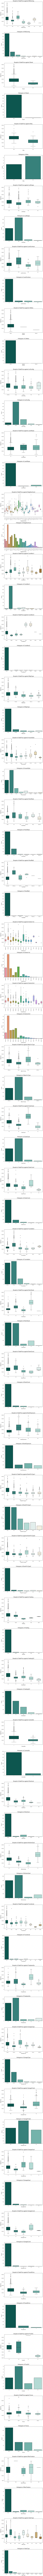

In [22]:
# plot box plots for all categorical columns

plot_boxandhist(ames, 'SalePrice', ames.select_dtypes(include='object').columns)

**Observations**

- The sale price varies a great deal between the type of `Neighborhood`. Within each neighborhood, there are also a large number of outliers. This is to be expected given the dependence of `SalePrice` on many other features as well e.g. `GrLivArea`.
- We will not remove any other outliers (these can be taken to be natural variation in the data) to preserve as much training data as possible.

Given the provided dataset, we see that there is clear variation in the `SalePrice` with some of our categorical and numerical features. Our objective is hence to extract those features that can help to best explain the variation in `SalePrice`. 

Prior to that, we would be required to perform data cleaning on the null values and outliers that were earlier identified.

# Data Cleaning

## Null Value Imputation

In [23]:
def fill_na(dataset, list_of_cols, value):
    """
    Fills up null values in columns passed as a list with the specified value.
    """
    for col_name in list_of_cols:
        dataset[col_name].fillna(value, inplace=True)

In [24]:
# fill categorical columns with 'None'

fill_na(ames, ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
               'GarageFinish', 'GarageCond', 'GarageQual', 'GarageType', 'BsmtFinType1', 
               'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'MasVnrType'],
       'None')

In [25]:
# fill BsmtExposure with 'No'

fill_na(ames, ['BsmtExposure'], 'No')

In [26]:
# fill LotFrontage based on the median value for the neighborhood that the house is in

ames['LotFrontage'] = ames['LotFrontage'].fillna(ames.groupby('Neighborhood')['LotFrontage'].transform('median'))

In [27]:
# there are a few observations where the Neighborhood has LotFrontage of 0. we will impute the remainder with the overall mean value

fill_na(ames, ['LotFrontage'], ames['LotFrontage'].mean())

In [28]:
# fill GarageYrBlt with the same value from the YearBlt column. while the lack of GarageYrBlt indicates that there is
# in fact no garage, we can reasonably impute with the YearBlt and assume that the two are correlated

ames['GarageYrBlt'] = ames['GarageYrBlt'].fillna(ames['YearBuilt'])

In [29]:
# fill remaining numerical values with 0

fill_na(ames, ['MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 
               'GarageArea', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 
               'TotalBsmtSF', 'BsmtUnfSF'],
        0)

In [30]:
# check that there are no more null values remaining in the dataset

ames.isnull().sum().sum()

0

## Removal of Outliers

In [31]:
# remove the two data points with GrLivArea greater than 5000

ames = ames[ames['GrLivArea'] < 5000]

In [32]:
# 2 rows have been dropped

ames.shape

(2049, 81)

## Other Miscellaneous Cleaning

In [33]:
# fix entry with GarageYrBlt greater than 2200

ames.loc[(ames['GarageYrBlt'] > 2200), 'GarageYrBlt'] = 2006

In [34]:
# convert MSSubClass to a nominal categorical variable

ames['MSSubClass'] = pd.Categorical(ames['MSSubClass'])

In [35]:
# convert MoSold to a nominal categorical variable

ames['MoSold'] = pd.Categorical(ames['MoSold'])

## Feature Engineering

### Combine Linear Features

At this juncture, we will attempt a few combinations of linear features to create better features that may relate to the price in a better way than the individual features would. These will also be passed through the feature selection process subsequently, and are to be dropped if they do not help to sufficient explain the variance in the `SalePrice`.

In [36]:
# combine YrSold and YearBuilt to get HouseAge

ames['HouseAge'] = ames['YrSold'] - ames['YearBuilt']

# it is likely that the price of the house sold is related to the age of the house itself

In [37]:
# combine YrSold and YearRemod/Add to get RemodYears

ames['RemodYears'] = ames['YrSold'] - ames['YearRemod/Add']

# the time since the last remodelling date may have an impact on the overall feel/look of the house

In [38]:
# combine TotalBsmtSF and GrLivArea to get TotalLivArea

ames['TotalLivArea'] = ames['TotalBsmtSF'] + ames['GrLivArea']

# this is a measure of the total living area, above and under ground

In [39]:
# combine YrSold and GarageYrBlt to get GarageAge

ames['GarageAge'] = ames['YrSold'] - ames['GarageYrBlt']

# similar to HouseAge, this is the age of the garage itself (or assuming if there were a garage)

### Interaction Features

Interaction terms are pairwise multiplication of two features that may help to explain how the combination of these features have a more pronounced effect on the target variable. Given the large number of features that the dataset has, it may be untenable to use `PolynomialFeatures` to create new interaction terms for each and every pair of variables. Hence, we will attempt to create only a single feature at this point: `OverallQual`, since there appears to be a slight non-linear relationship based on the previous scatter plot with `SalePrice`.

In [40]:
# obtain a squared feature for OverallQual

ames['OverallQualSquared'] = ames['OverallQual'] ** 2

### Encode Ordinal Categorical Features

Ordinal categorical features can also be encoded to numerical features to allow us to calculate the Pearson correlation coefficient with the `SalePrice` as well.

In doing so, we make the assumption that the ordinal categories within each feature are equally spaced apart.

In [41]:
# define a function to encode all ordinal categorical features that are not numerical
# function encodes 21 out of the original 23 ordinal categorical features

def encode_ordinal_features(dataframe):
    """
    Encodes all ordinal categorical features (non-numeric) into numerical features for the Ames housing dataset.
    """
    dataframe['LotShape'] = dataframe['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
    dataframe['Utilities'] = dataframe['Utilities'].map({'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0})
    dataframe['LandSlope'] = dataframe['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})
    dataframe['ExterQual'] = dataframe['ExterQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    dataframe['ExterCond'] = dataframe['ExterCond'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    dataframe['BsmtQual'] = dataframe['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
    dataframe['BsmtCond'] = dataframe['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})                                                    
    dataframe['BsmtExposure'] = dataframe['BsmtExposure'].map({'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0})
    dataframe['BsmtFinType1'] = dataframe['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
    dataframe['BsmtFinType2'] = dataframe['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})                                                    
    dataframe['HeatingQC'] = dataframe['HeatingQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    dataframe['KitchenQual'] = dataframe['KitchenQual'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
    dataframe['FireplaceQu'] = dataframe['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
    dataframe['GarageFinish'] = dataframe['GarageFinish'].map({'Fin': 3, 'RFn':2, 'Unf':1, 'None':0})
    dataframe['GarageQual'] = dataframe['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
    dataframe['GarageCond'] = dataframe['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})                                                        
    dataframe['Electrical'] = dataframe['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0})
    dataframe['Functional'] = dataframe['Functional'].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})
    dataframe['PavedDrive'] = dataframe['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0})
    dataframe['PoolQC'] = dataframe['PoolQC'].map({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0})
    dataframe['Fence'] = dataframe['Fence'].map({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0})    

In [42]:
# perform encoding of ordinal features using function

encode_ordinal_features(ames)

In [43]:
# check dtypes of dataset again

ames.dtypes

Id                       int64
PID                      int64
MSSubClass            category
MSZoning                object
LotFrontage            float64
LotArea                  int64
Street                  object
Alley                   object
LotShape                 int64
LandContour             object
Utilities                int64
LotConfig               object
LandSlope                int64
Neighborhood            object
Condition1              object
Condition2              object
BldgType                object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemod/Add            int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual                int64
ExterCond                int64
Foundation              object
BsmtQual                 int64
BsmtCond

# Feature Selection

Having performed our data cleaning steps, we will now perform a round of feature selection to reduce the number of features passed to our initial model.

For nominal categorical features, we will eliminate those which have more than 90% of data in the majority class, as this is indicative that the feature will not be particularly useful in explaining the variance in our target feature `SalePrice`.

For numerical features, we will use the `.corr` method to first obtain the Pearson correlation coefficient for each feature with `SalePrice`. We will only keep those which are above our threshold of `0.5`, as 

Additionally, collinear numerical features should also be trimmed to reduce the amount of redundancy in our training data, and to obtain more accurate coefficients for our variables. This will also help to mitigate the issue of overfitting of our model.

In [44]:
# define a similar function for plotting boxplots for categorical feature with additional horizontal line
# indicating 90% of the data

def plot_boxandhistwithline(dataframe, column_name, categorical_cols):
    """ 
    This function plots box plots for a given column name, split by the various categories of another column(s) of the dataframe.
    It also plots the histogram for the categorical column itself and a horizontal line marking 90% of the data.
    """    
    nrows = 2*len(categorical_cols)
    fig, ax = plt.subplots(nrows=2*len(categorical_cols), figsize=(10, 7*nrows))   
    ax = ax.ravel()
        
    for i, categorical_col in enumerate(categorical_cols):
    
        sns.boxplot(y=dataframe[column_name], x=dataframe[categorical_col], width=0.5, ax=ax[2*i])
        sns.countplot(x=dataframe[categorical_col], linewidth=1.5, edgecolor='black', ax=ax[2*i+1])
        ax[2*i+1].axhline(dataframe[categorical_col].shape[0]*0.9, linestyle='dotted', linewidth=1)

        ax[2*i].set_title(f'Boxplot of {column_name} against {categorical_col}', fontsize=20)
        ax[2*i].set_xlabel(categorical_col, fontsize=15)
        ax[2*i].set_ylabel(column_name, fontsize=15)
        ax[2*i+1].set_title(f'Histogram of {categorical_col}', fontsize=20)
        ax[2*i+1].set_xlabel(categorical_col, fontsize=15)
        ax[2*i+1].set_ylabel('Count', fontsize=15)
        
        if dataframe[categorical_col].nunique() > 10:
            for label in ax[2*i].get_xticklabels():
                label.set_rotation(90) 
            for label in ax[2*i+1].get_xticklabels():
                label.set_rotation(90)
                
    fig.tight_layout()

## Nominal Categorical Features

We first examine all nominal categorical features.

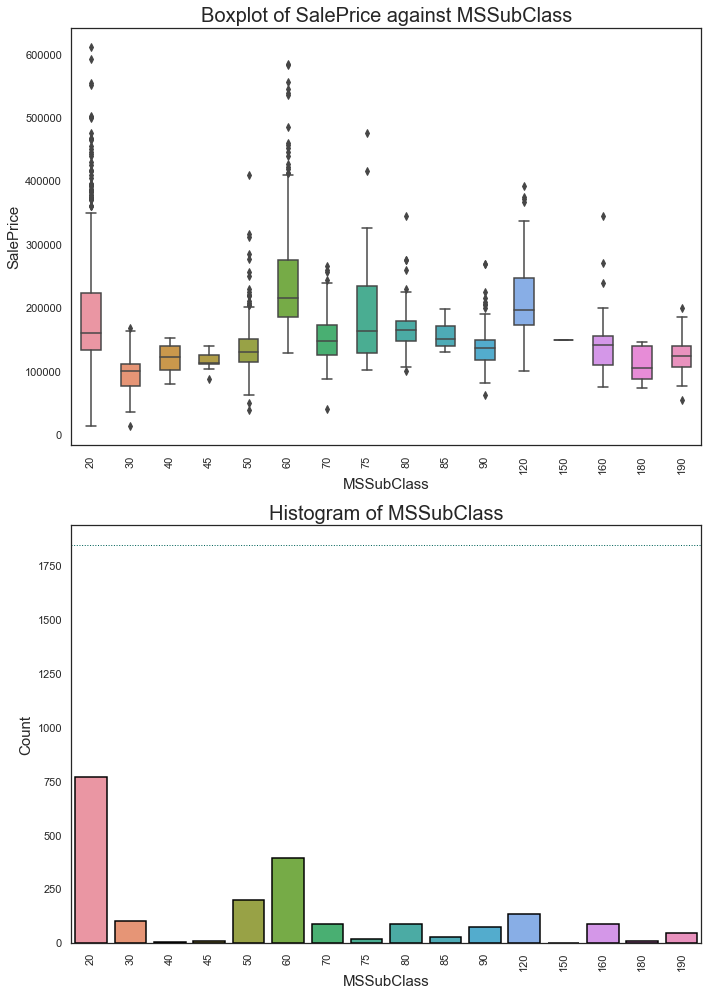

In [45]:
# examine boxplots for MSSubClass

plot_boxandhistwithline(ames, 'SalePrice', ['MSSubClass'])

**Observations**

Clear variation of `SalePrice` with `MSSubClass`. 

Keep `MSSubClass`.

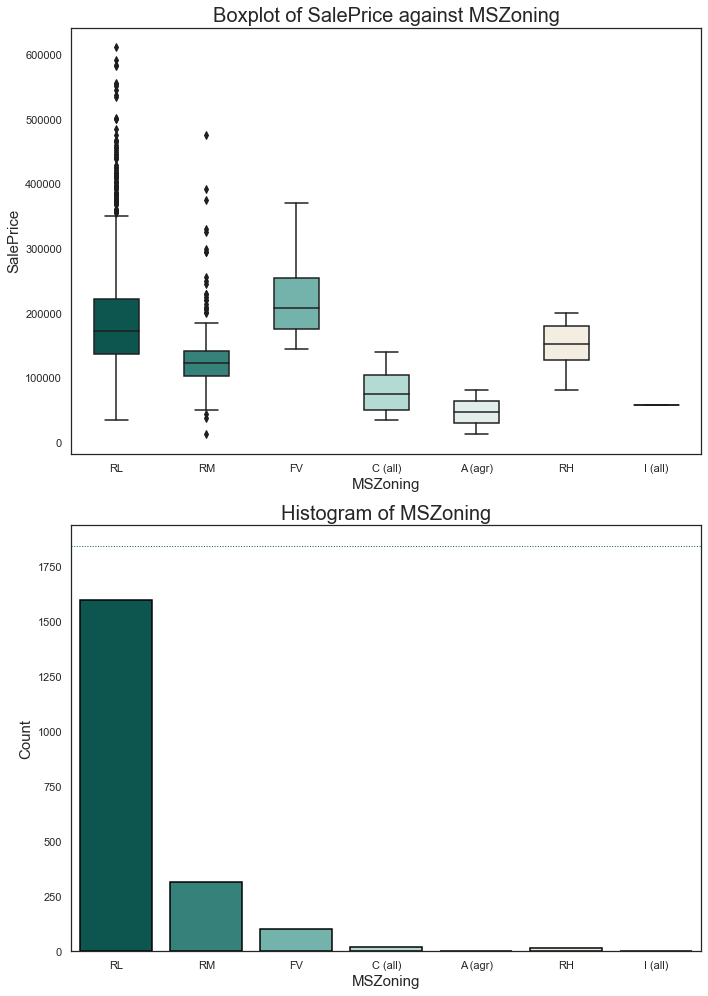

In [46]:
# examine boxplots for MSZoning

plot_boxandhistwithline(ames, 'SalePrice', ['MSZoning'])

**Observations**

Clear variation of `SalePrice` with `MSZoning`. 

Keep `MSZoning`.

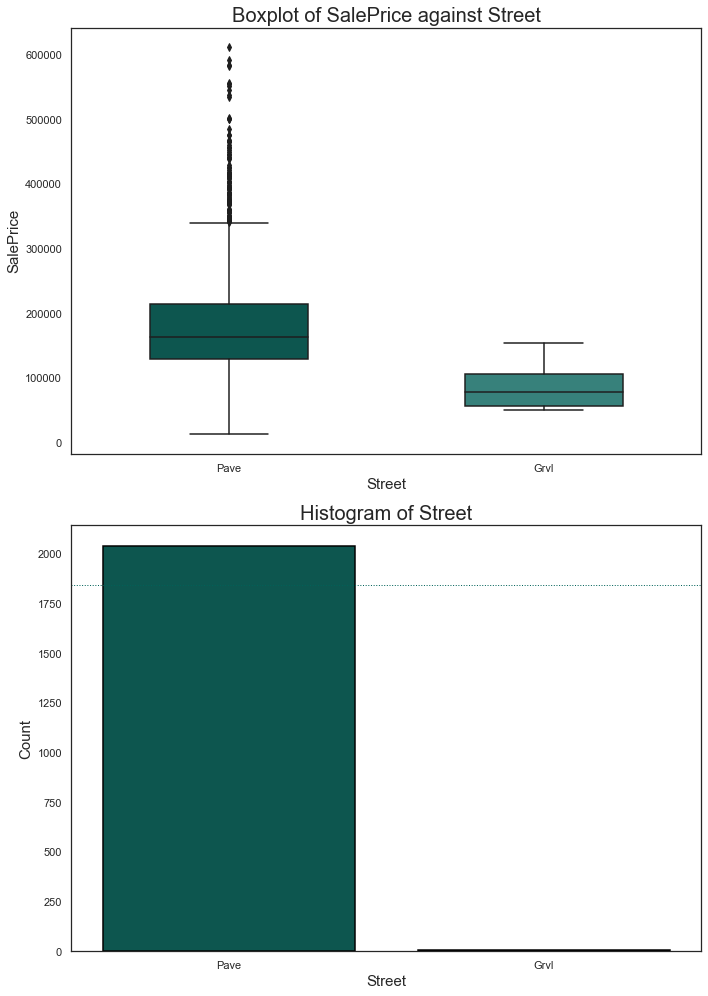

In [47]:
# examine box plot for Street

plot_boxandhistwithline(ames, 'SalePrice', ['Street'])

**Observations**

Drop `Street` as count of majority class exceeds threshold.

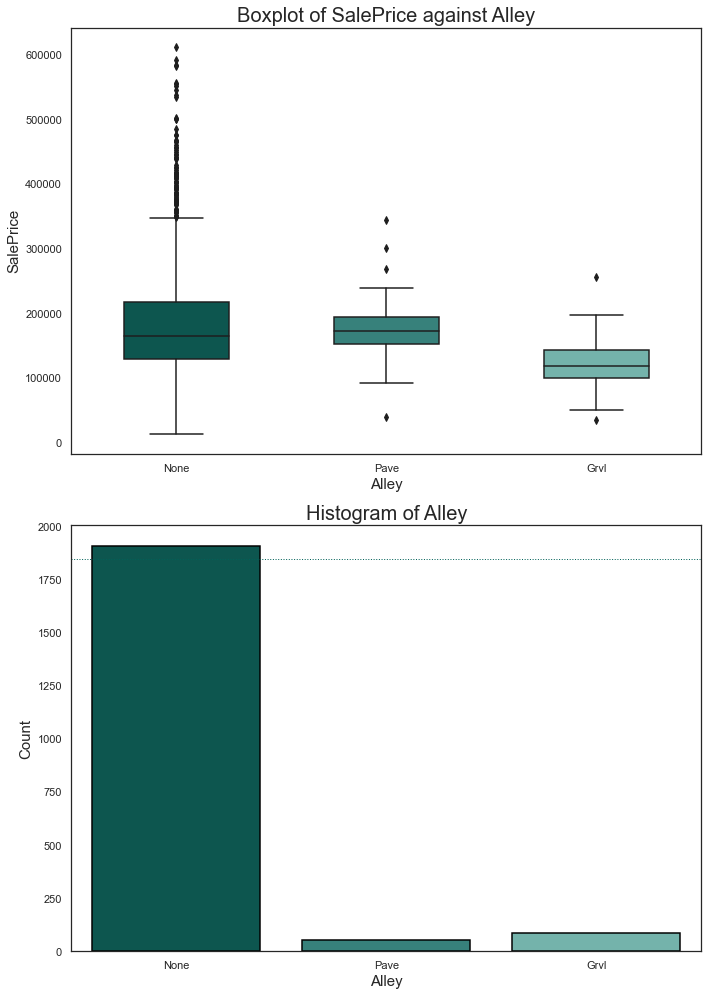

In [48]:
# examine box plot for Alley

plot_boxandhistwithline(ames, 'SalePrice', ['Alley'])

**Observations**

Drop `Alley` as count of majority class exceeds threshold.

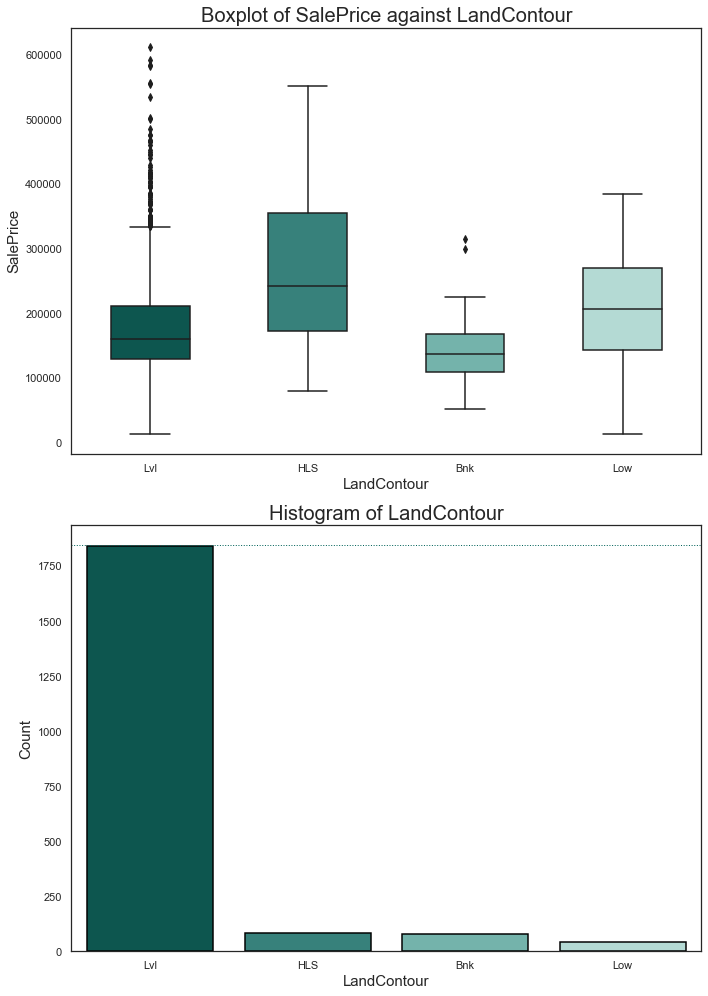

In [49]:
# examine box plot for LandContour

plot_boxandhistwithline(ames, 'SalePrice', ['LandContour'])

**Observations**

Drop `LandContour` as count of majority class is at threshold.

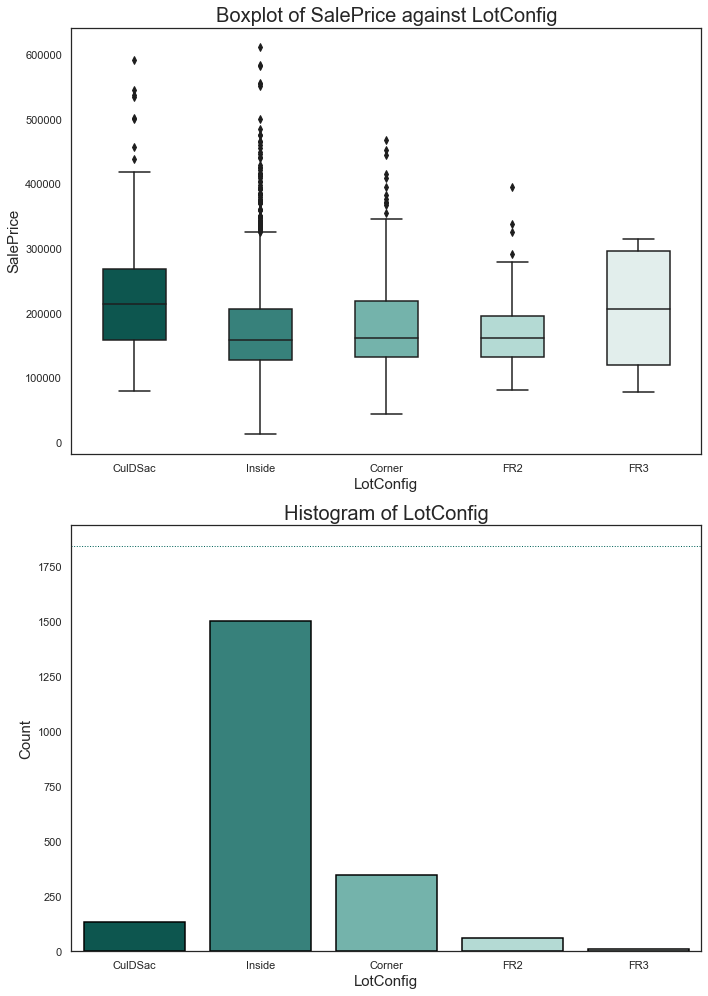

In [50]:
# examine box plot for LotConfig

plot_boxandhistwithline(ames, 'SalePrice', ['LotConfig'])

**Observations**

There is little variation in the prices across categories. 

Drop `LotConfig`.

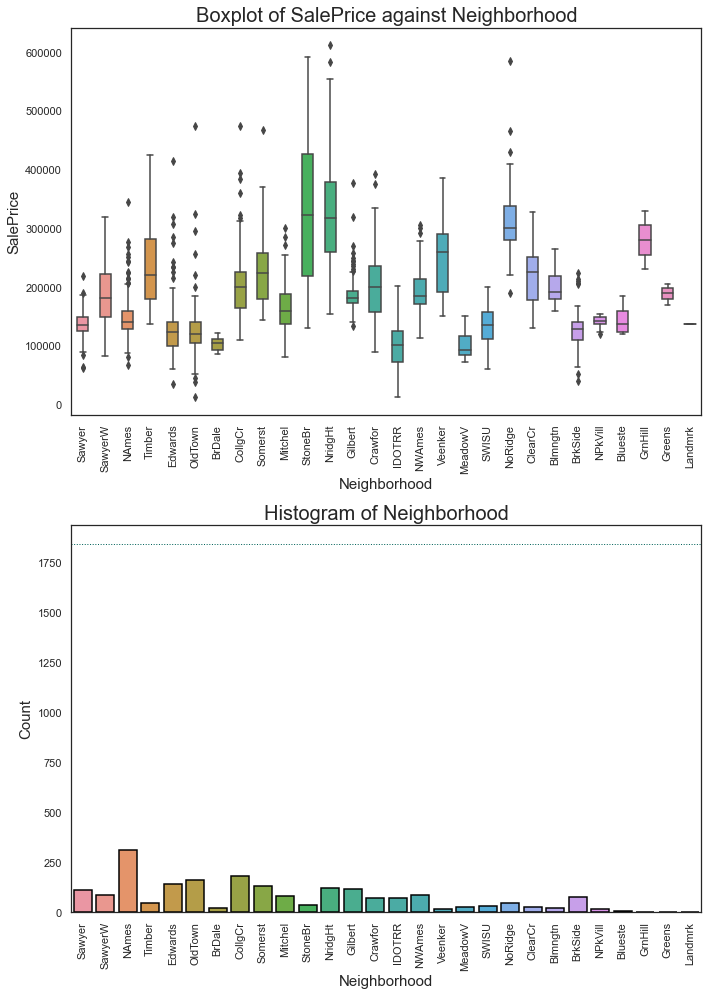

In [51]:
# examine box plot for Neighborhood

plot_boxandhistwithline(ames, 'SalePrice', ['Neighborhood'])

**Observations**

Clear variation in the prices across categories. 

Keep `Neighborhood`.

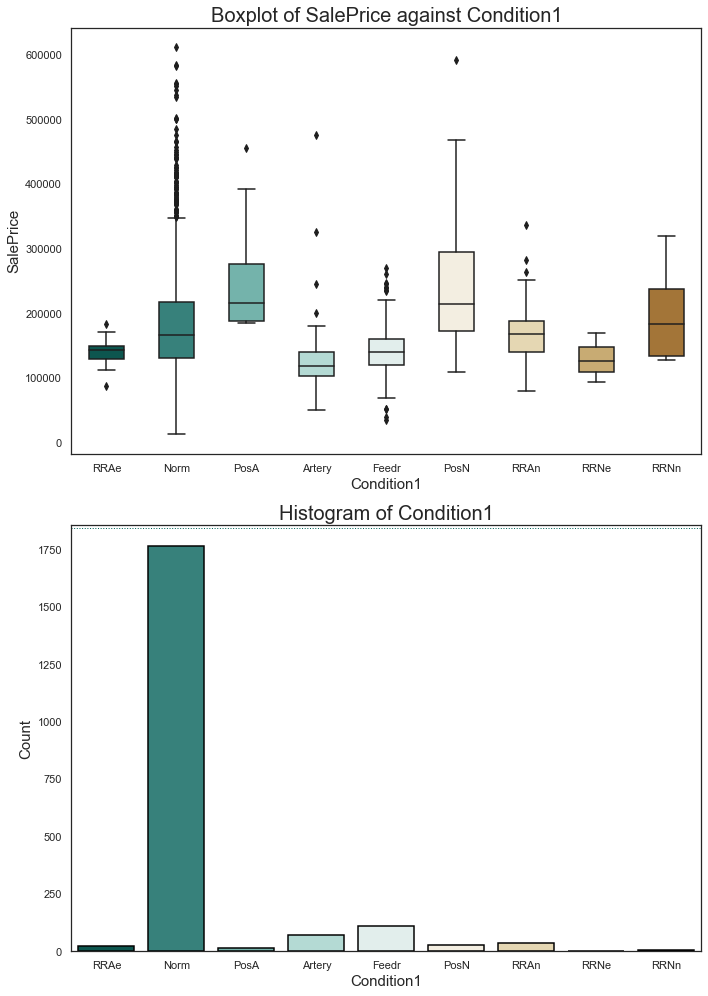

In [52]:
# examine box plot for Condition1

plot_boxandhistwithline(ames, 'SalePrice', ['Condition1'])

**Observations**

There is some variation in the prices across categories. Count of majority class is close to threshold. 

Keep `Condition1`.

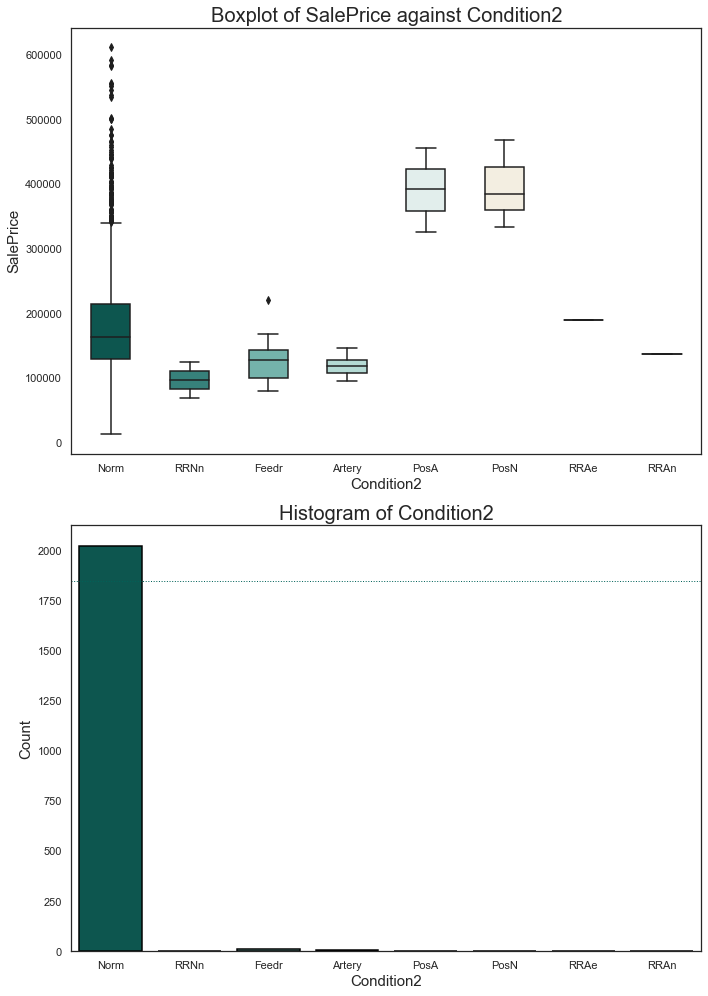

In [53]:
# examine box plot for Condition2

plot_boxandhistwithline(ames, 'SalePrice', ['Condition2'])

**Observations**

Drop `Condition2` as count of majority class exceeds threshold.

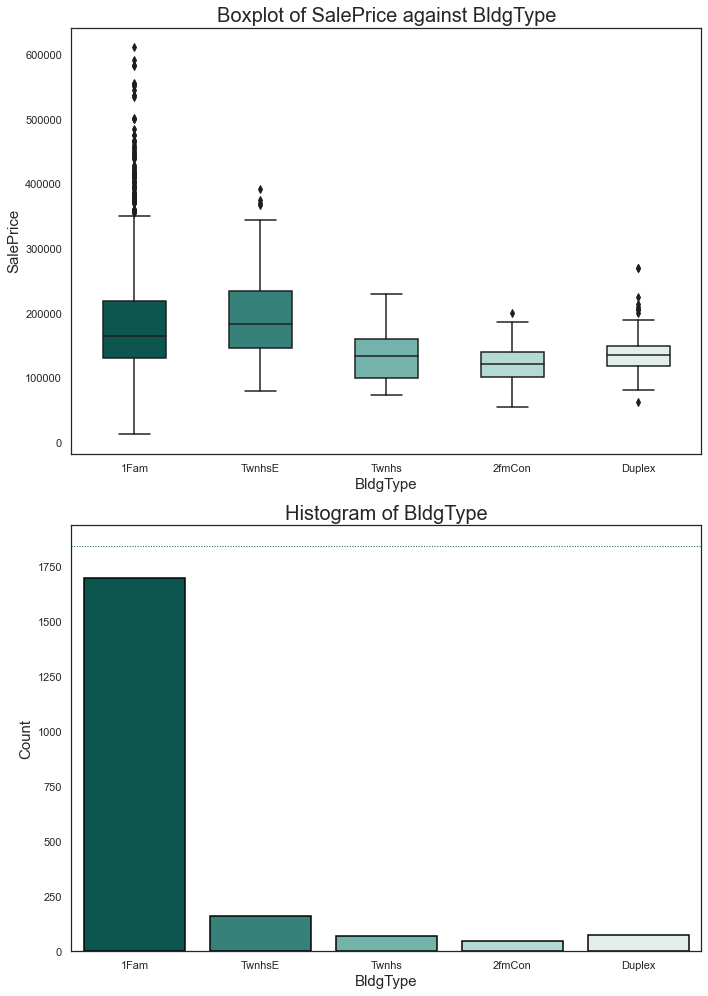

In [54]:
# examine box plot for BldgType

plot_boxandhistwithline(ames, 'SalePrice', ['BldgType'])

**Observations**

There is little variation in the prices across categories. 

Drop `BldgType`.

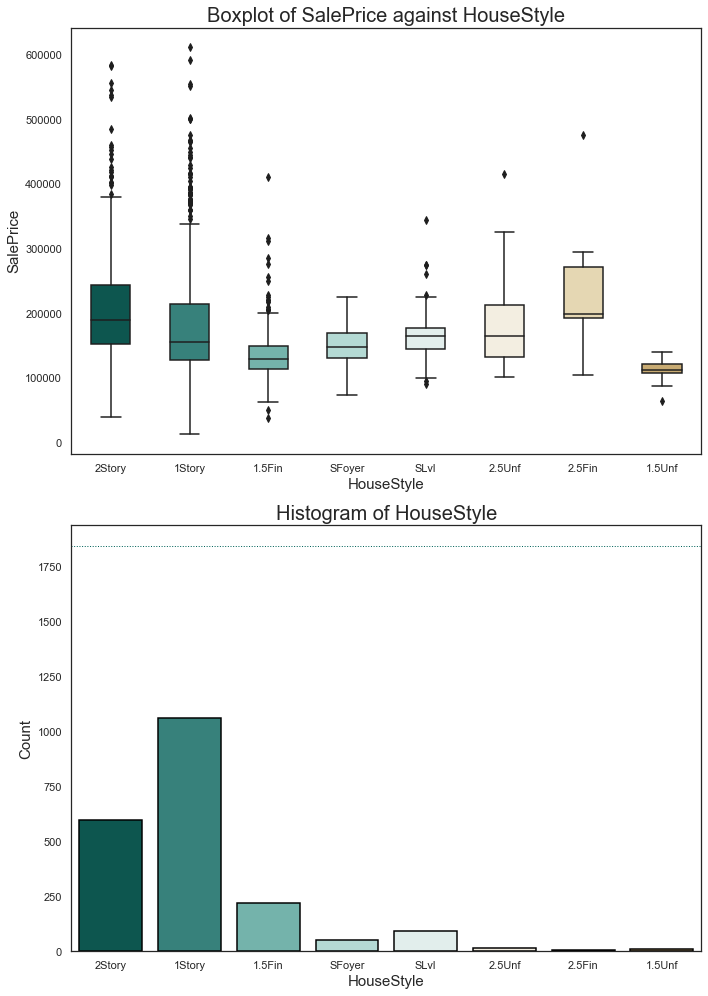

In [55]:
# examine box plot for HouseStyle

plot_boxandhistwithline(ames, 'SalePrice', ['HouseStyle'])

**Observations**

There is slight variation in the prices across categories. 

Keep `HouseStyle`.

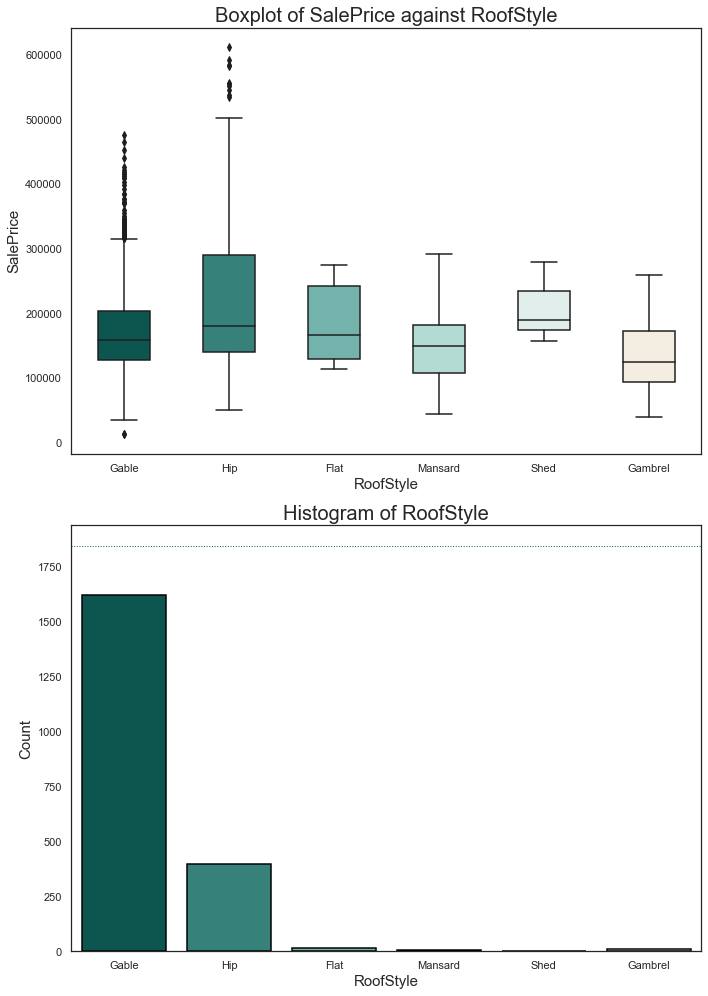

In [56]:
# examine box plot for RoofStyle

plot_boxandhistwithline(ames, 'SalePrice', ['RoofStyle'])

**Observations**

There is little variation in the prices across categories. 

Drop `RoofStyle`.

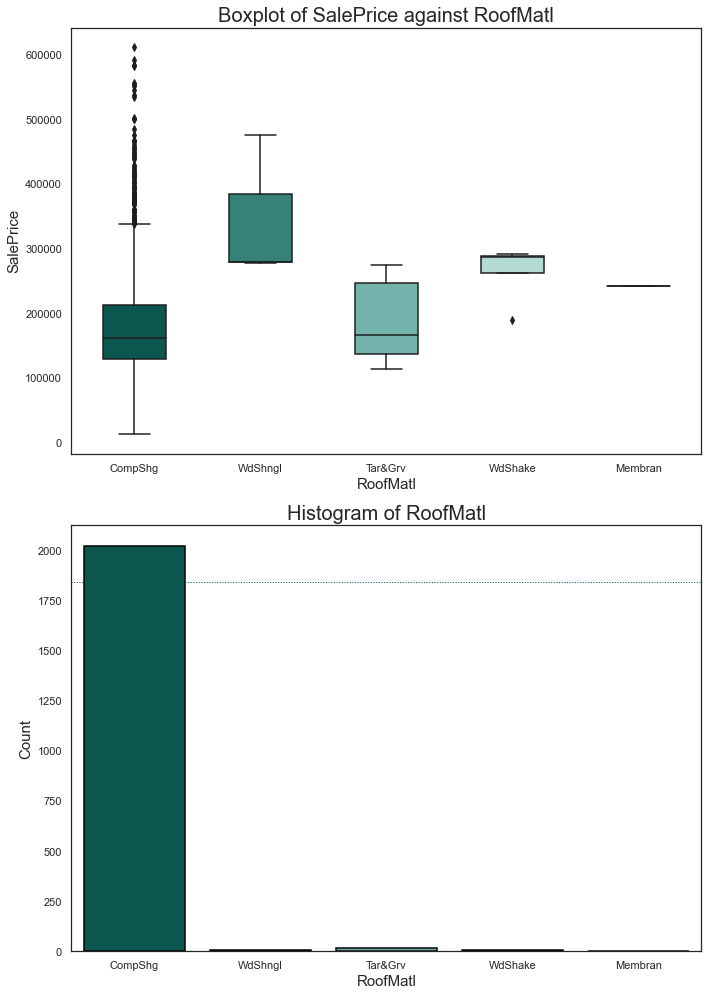

In [57]:
# examine box plot for RoofMatl

plot_boxandhistwithline(ames, 'SalePrice', ['RoofMatl'])

**Observations**

Drop `RoofMatl` as count of majority class exceeds threshold.

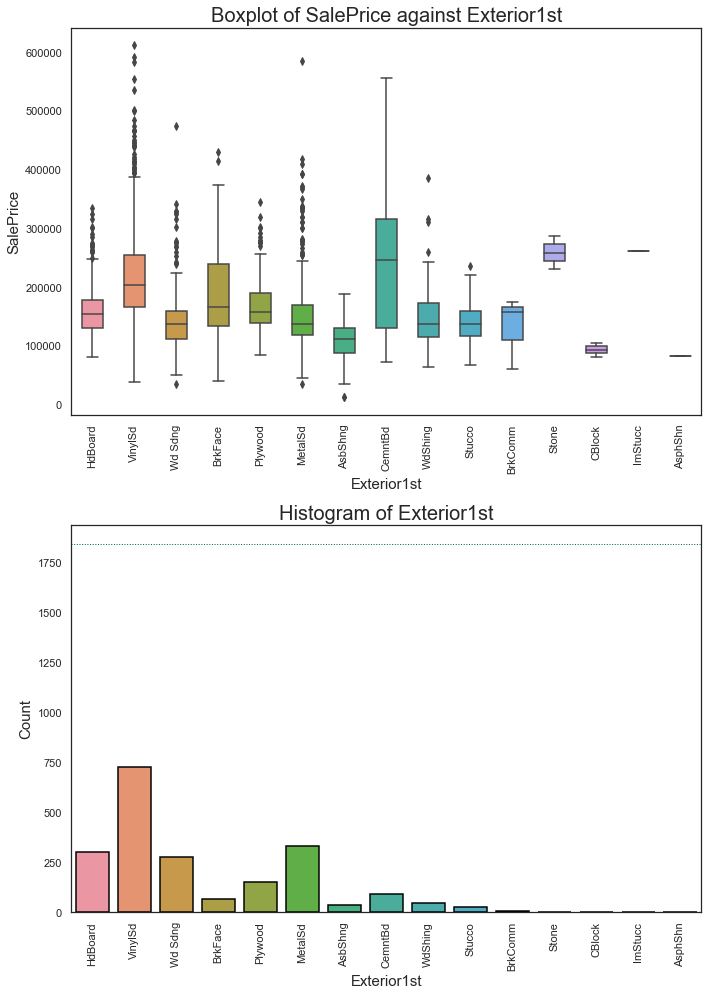

In [58]:
# examine box plot for Exterior1st

plot_boxandhistwithline(ames, 'SalePrice', ['Exterior1st'])

**Observations**

There is notable variation in the prices across categories. 

Keep `Exterior1st`.

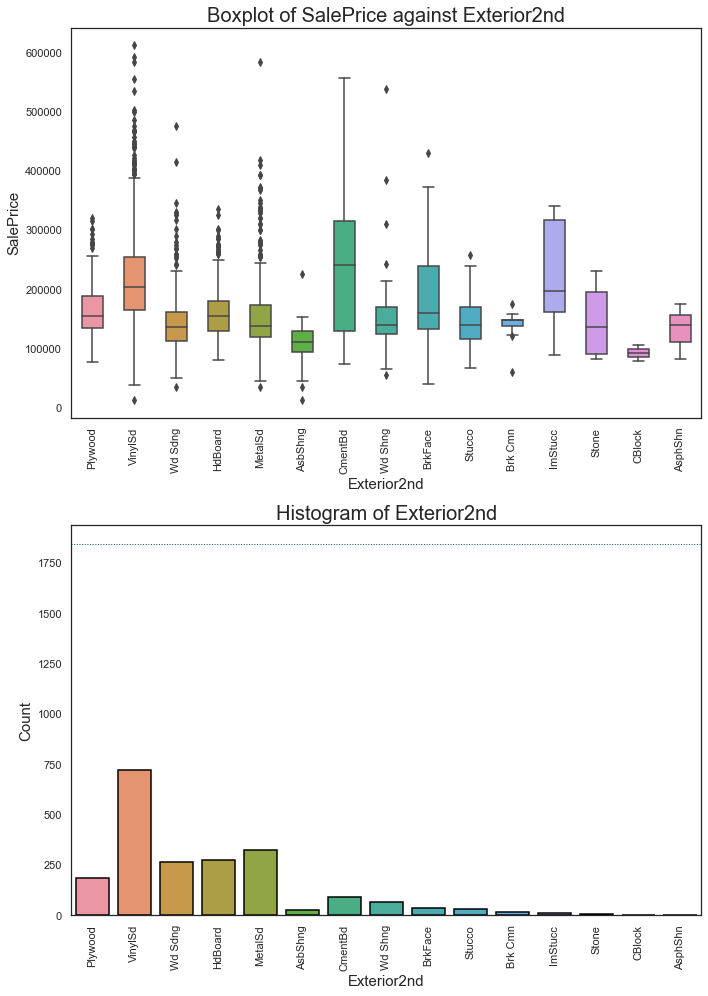

In [59]:
# examine box plot for Exterior2nd

plot_boxandhistwithline(ames, 'SalePrice', ['Exterior2nd'])

**Observations**

There is notable variation in the prices across categories. 

Keep `Exterior2nd`.

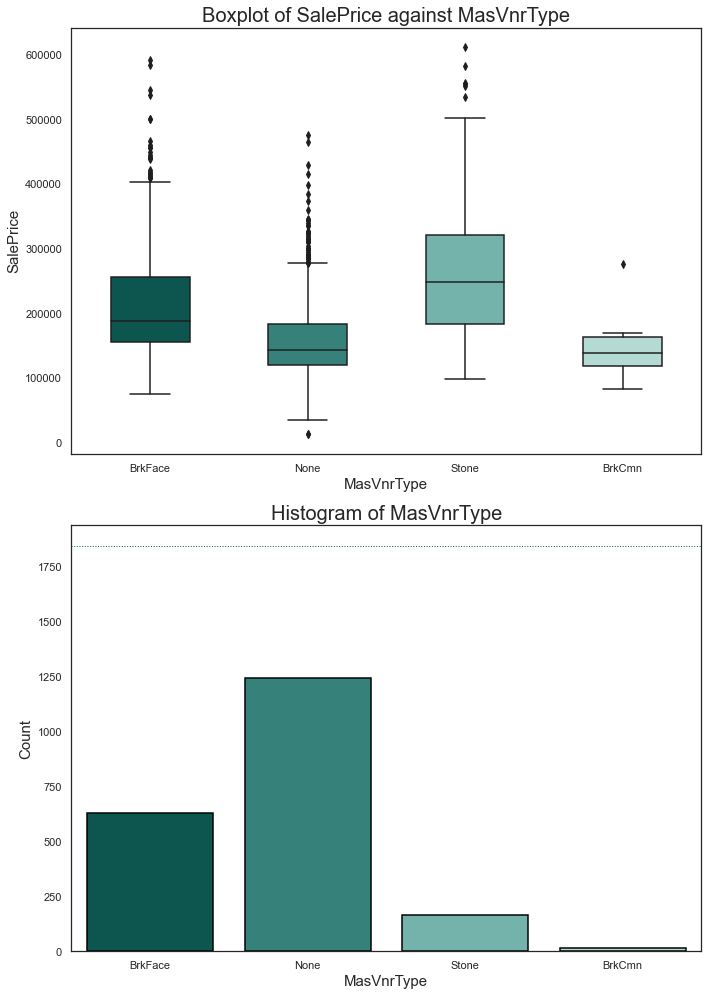

In [60]:
# examine box plot for MasVnrType

plot_boxandhistwithline(ames, 'SalePrice', ['MasVnrType'])

**Observations**

There is some variation in the prices across categories. 

Keep `MasVnrType`.

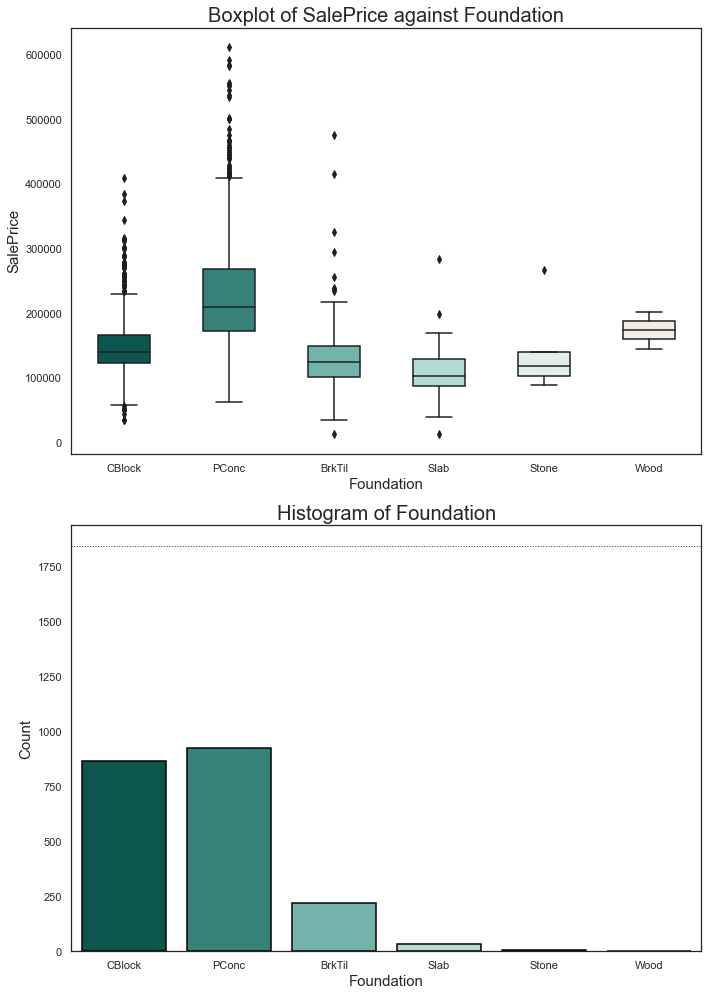

In [61]:
# examine box plot for Foundation

plot_boxandhistwithline(ames, 'SalePrice', ['Foundation'])

**Observations**

There is slight variation in the prices across categories. 

Keep `Foundation`.

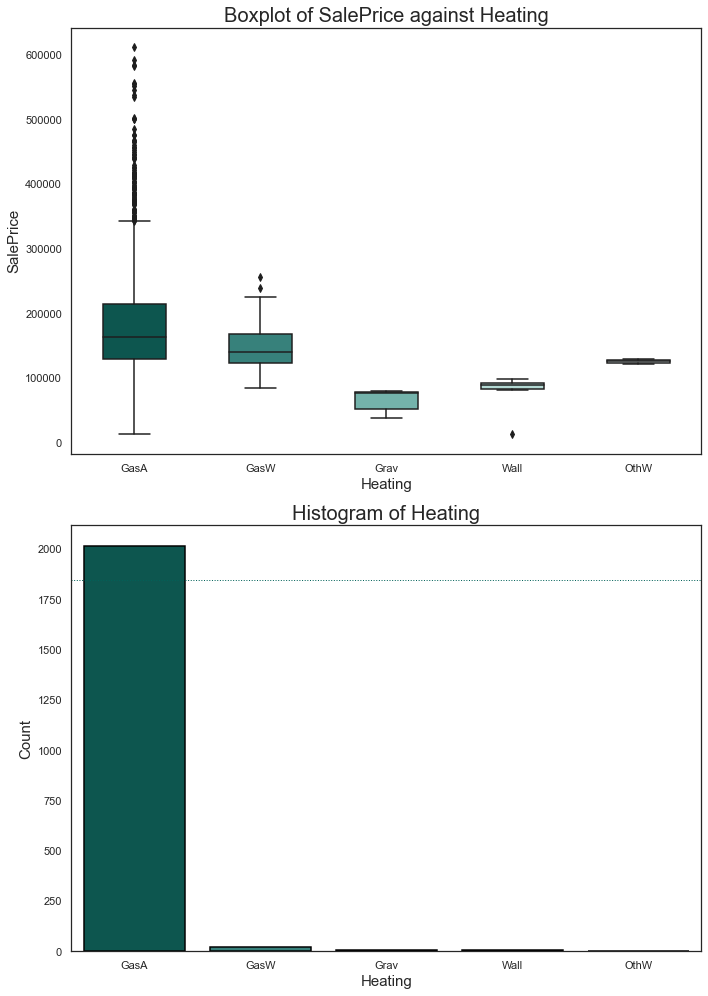

In [62]:
# examine box plot for Heating

plot_boxandhistwithline(ames, 'SalePrice', ['Heating'])

**Observations**

Drop `Heating` as count of majority class exceeds threshold.

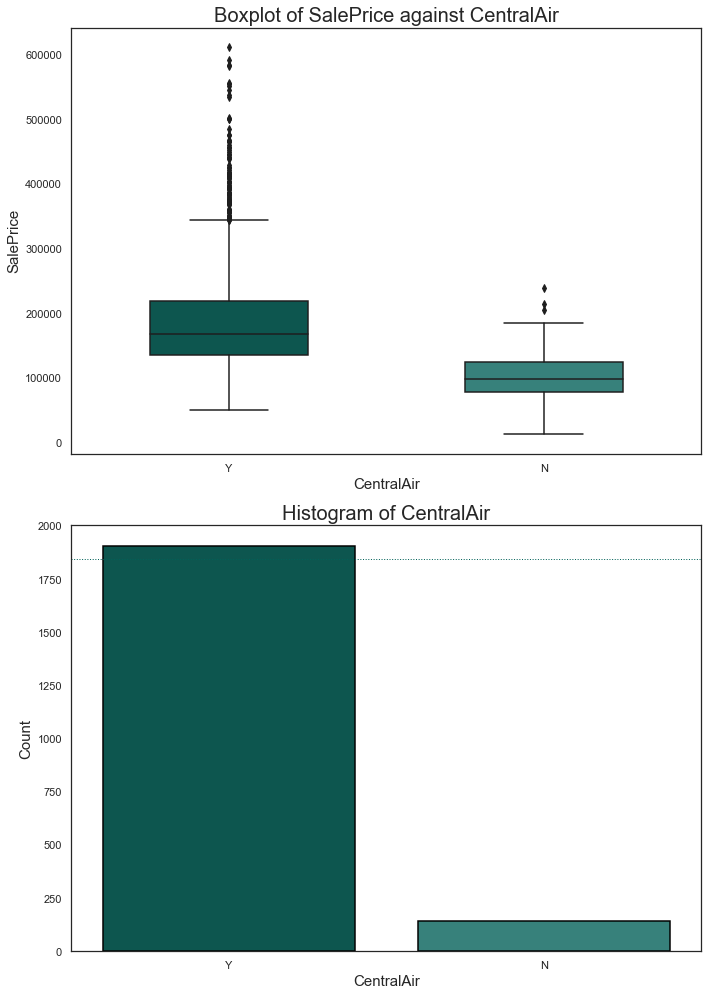

In [63]:
# examine box plot for CentralAir

plot_boxandhistwithline(ames, 'SalePrice', ['CentralAir'])

**Observations**

Drop `CentralAir` as count of majority class exceeds threshold.

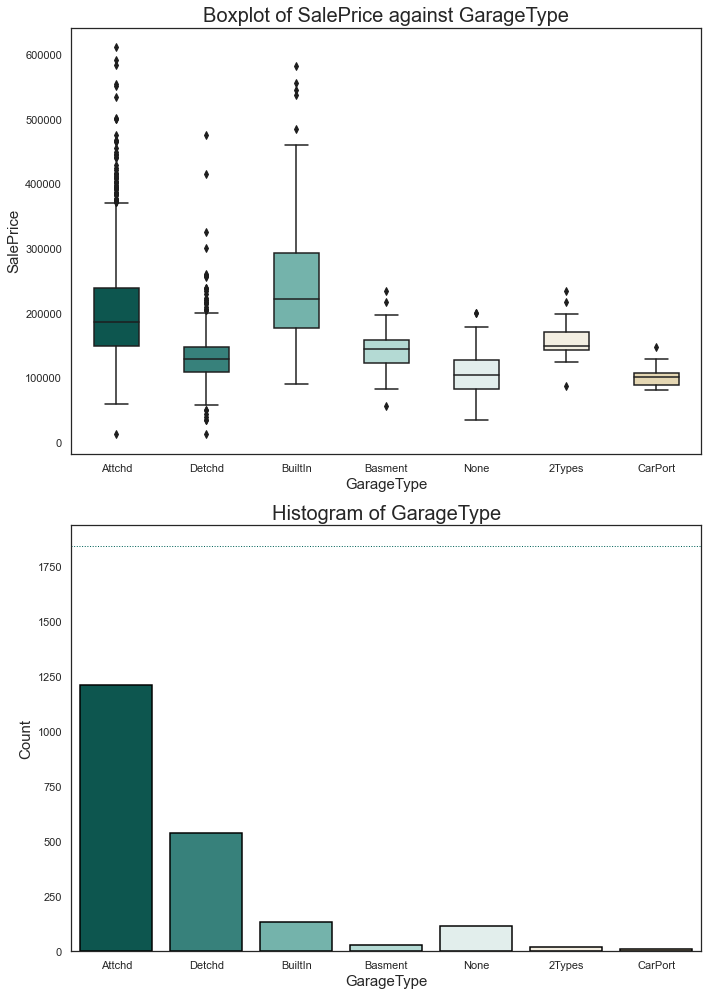

In [64]:
# examine box plot for GarageType

plot_boxandhistwithline(ames, 'SalePrice', ['GarageType'])

**Observations**

There is clear variation in the prices across categories. 

Keep `GarageType`.

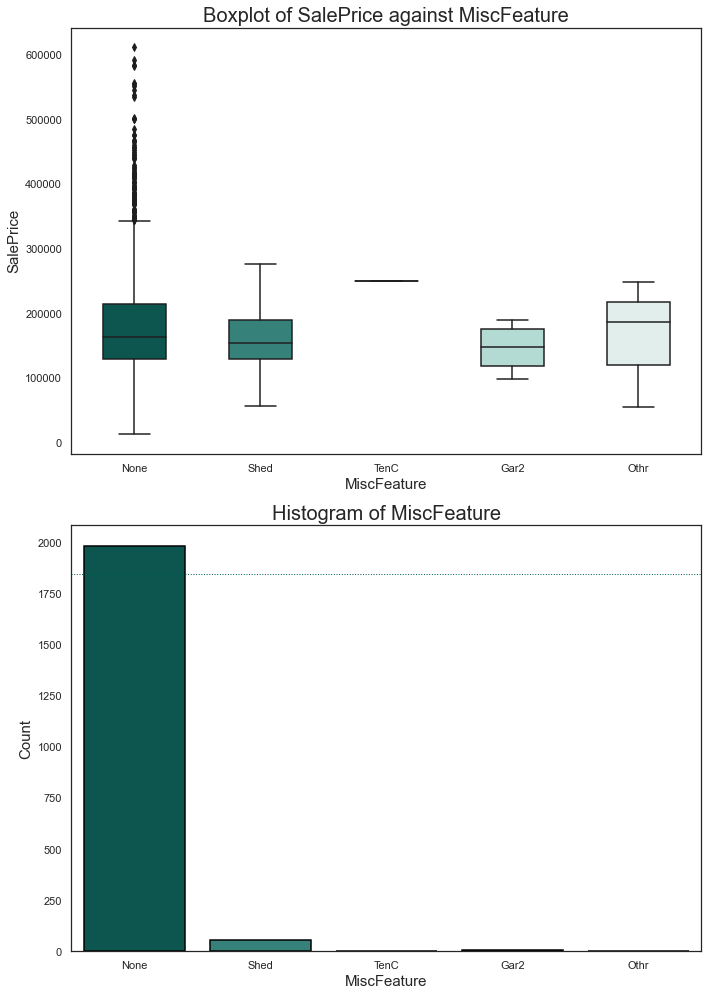

In [65]:
# examine box plot for MiscFeature

plot_boxandhistwithline(ames, 'SalePrice', ['MiscFeature'])

**Observations**

Drop `MiscFeature` as count of majority class exceeds threshold.

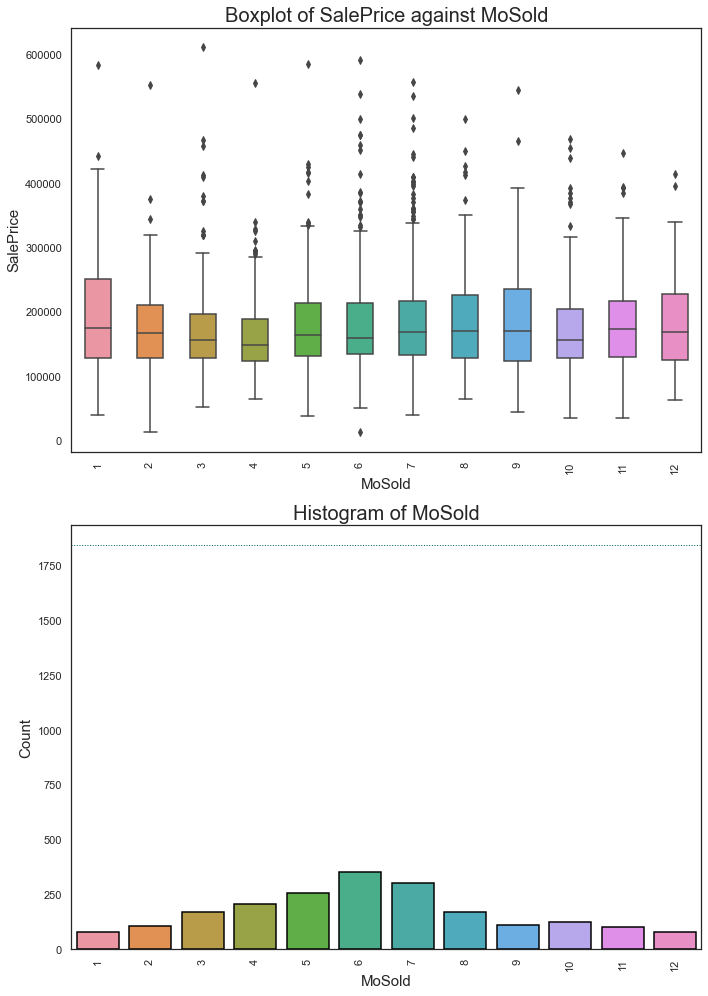

In [66]:
# examine box plot for MoSold

plot_boxandhistwithline(ames, 'SalePrice', ['MoSold'])

**Observations**

While the histogram for `MoSold` looks somewhat normally distributed, there is little variation in the median price with the month.

Drop `MoSold`.

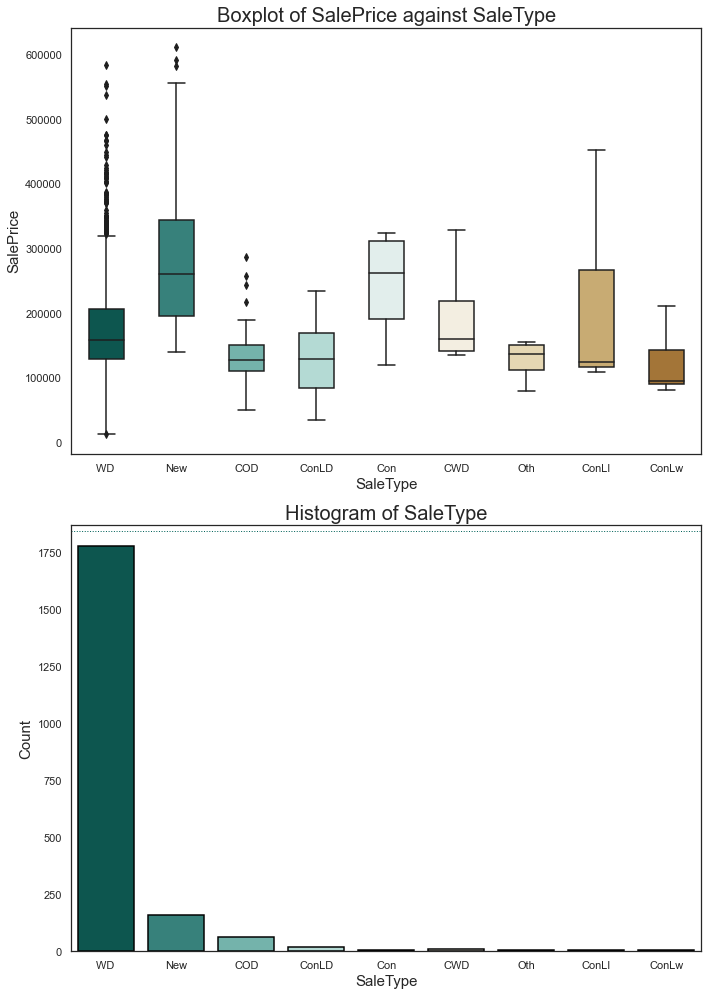

In [67]:
# examine box plot for SaleType

plot_boxandhistwithline(ames, 'SalePrice', ['SaleType'])

**Observations**

There is some variation in the sale price, however the count of majority class is very close to the threshold. It is unlikely that the type of sale has any relation to the sale price.

Drop `SaleType`.

## Ordinal Categorical Features

As we have encoded all the ordinal categorical features into numerical features, we can subsume the visualization under numerical features in the next section.

## Numerical Features

We first do a preliminary dropping of features which were deemed not to be useful earlier on, or have undergone transformation to create another feature during the feature engineering stage. These would include the following:

- `Id`
- `PID`
- `YearBuilt`
- `YearRemod/Add`
- `GarageYrBlt`
- `YrSold`

In [68]:
ames = ames.drop(columns=['Id', 'PID', 'YearBuilt', 'YearRemod/Add', 'GarageYrBlt', 'YrSold'], axis=1)

We can visualize the correlations between all numeric features (including those that have been encoded from ordinal categorical features using a heatmap.

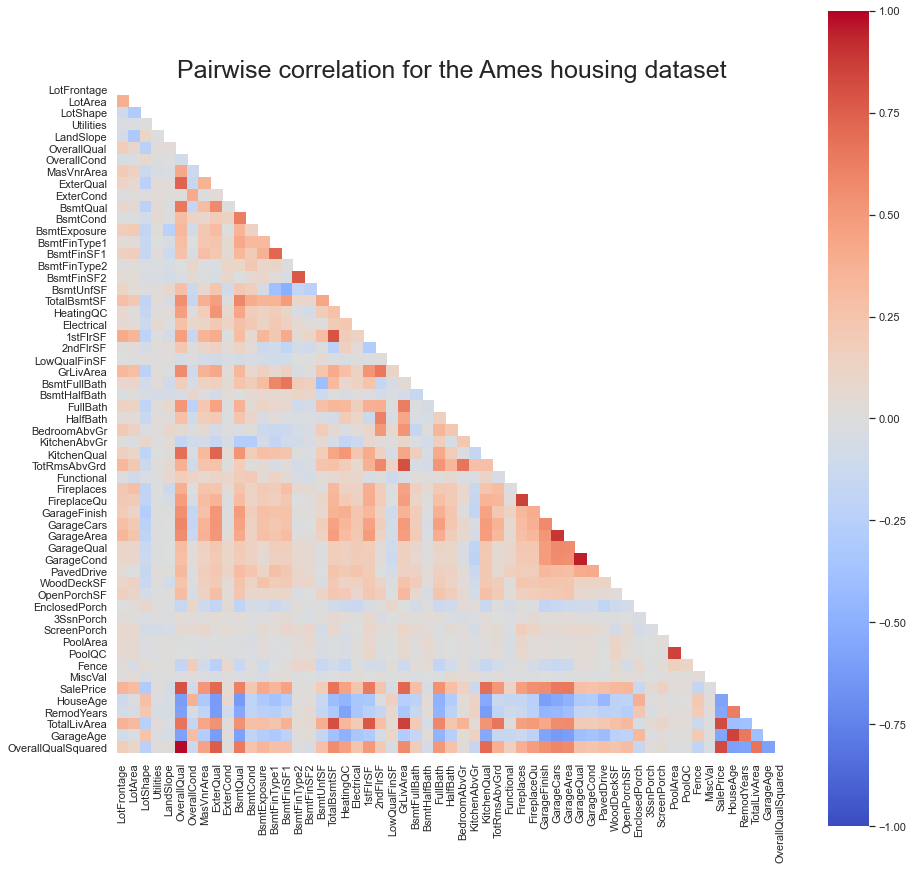

In [69]:
# generates a heatmap using Seaborn to visualize correlations between all numeric features

plt.figure(figsize=(15,15))

mask = np.triu(ames.corr()) 
sns.heatmap(ames.corr(), square=True, mask=mask, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Pairwise correlation for the Ames housing dataset', fontsize=25);

We can first isolate the features that show stronger correlation with our target variable `SalePrice`.

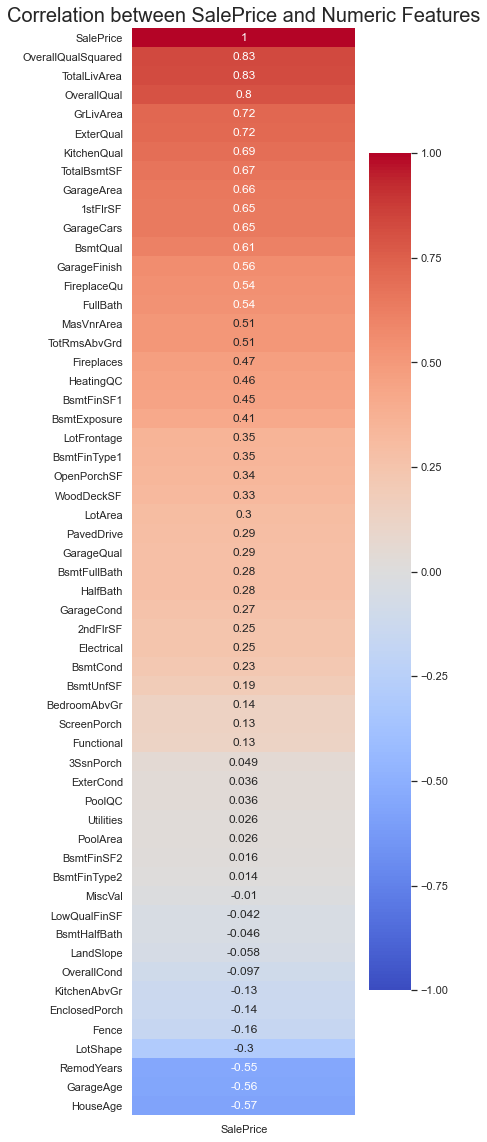

In [70]:
plt.figure(figsize=(5,20))
sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), cmap='coolwarm', annot=True,
            vmin=-1, vmax=1)
plt.title('Correlation between SalePrice and Numeric Features', fontsize=20);

We target those features that show relatively strong positive/negative correlation (i.e. `>= 0.50` or `<= -0.50`) with our target variable `SalePrice`.

In [71]:
abs(ames.corr()['SalePrice'].sort_values(ascending=False)) >= 0.5

SalePrice              True
OverallQualSquared     True
TotalLivArea           True
OverallQual            True
GrLivArea              True
ExterQual              True
KitchenQual            True
TotalBsmtSF            True
GarageArea             True
1stFlrSF               True
GarageCars             True
BsmtQual               True
GarageFinish           True
FireplaceQu            True
FullBath               True
MasVnrArea             True
TotRmsAbvGrd           True
Fireplaces            False
HeatingQC             False
BsmtFinSF1            False
BsmtExposure          False
LotFrontage           False
BsmtFinType1          False
OpenPorchSF           False
WoodDeckSF            False
LotArea               False
PavedDrive            False
GarageQual            False
BsmtFullBath          False
HalfBath              False
GarageCond            False
2ndFlrSF              False
Electrical            False
BsmtCond              False
BsmtUnfSF             False
BedroomAbvGr        

We can then check between the selected features to see whether any of the pairs exhibit collinearity with one another. If so, we can drop one of them and choose to keep the feature which shows a stronger correlation with `SalePrice`, as it would be a stronger predictor in that case.

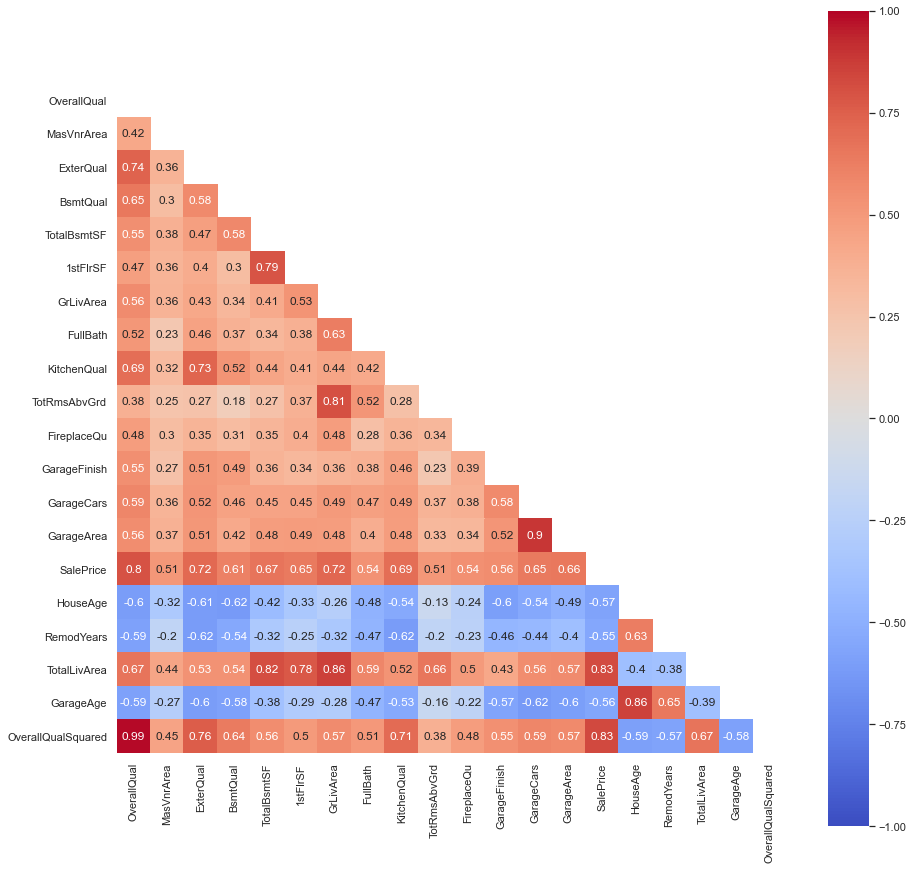

In [72]:
correlated_features = ames.corr()['SalePrice'][abs(ames.corr()['SalePrice'].sort_values(ascending=False)) >= 0.5].index

plt.figure(figsize=(15,15))

mask = np.triu(ames[correlated_features].corr()) 
sns.heatmap(ames[correlated_features].corr(), square=True, mask=mask, vmin=-1, vmax=1, cmap='coolwarm', annot=True);

In [73]:
ames[correlated_features].corr()[ames[correlated_features].corr() > 0.8]

OverallQual  MasVnrArea  ExterQual  BsmtQual  TotalBsmtSF  \
OverallQual            1.000000         NaN        NaN       NaN          NaN   
MasVnrArea                  NaN         1.0        NaN       NaN          NaN   
ExterQual                   NaN         NaN        1.0       NaN          NaN   
BsmtQual                    NaN         NaN        NaN       1.0          NaN   
TotalBsmtSF                 NaN         NaN        NaN       NaN     1.000000   
1stFlrSF                    NaN         NaN        NaN       NaN          NaN   
GrLivArea                   NaN         NaN        NaN       NaN          NaN   
FullBath                    NaN         NaN        NaN       NaN          NaN   
KitchenQual                 NaN         NaN        NaN       NaN          NaN   
TotRmsAbvGrd                NaN         NaN        NaN       NaN          NaN   
FireplaceQu                 NaN         NaN        NaN       NaN          NaN   
GarageFinish                NaN         NaN        NaN       NaN          NaN   
GarageCars                  NaN         NaN        NaN       NaN          NaN   
GarageArea                  NaN         NaN        NaN       NaN          NaN   
SalePrice              0.803462         NaN        NaN       NaN          NaN   
HouseAge                    NaN         NaN        NaN       NaN          NaN   
RemodYears                  NaN         NaN        NaN       NaN          NaN   
TotalLivArea                NaN         NaN        NaN       NaN     0.816296   
GarageAge                   NaN         NaN        NaN       NaN          NaN   
OverallQualSquared     0.986832         NaN        NaN       NaN          NaN   

                    1stFlrSF  GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  \
OverallQual              NaN        NaN       NaN          NaN           NaN   
MasVnrArea               NaN        NaN       NaN          NaN           NaN   
ExterQual                NaN        NaN       NaN          NaN           NaN   
BsmtQual                 NaN        NaN       NaN          NaN           NaN   
TotalBsmtSF              NaN        NaN       NaN          NaN           NaN   
1stFlrSF                 1.0        NaN       NaN          NaN           NaN   
GrLivArea                NaN   1.000000       NaN          NaN      0.812129   
FullBath                 NaN        NaN       1.0          NaN           NaN   
KitchenQual              NaN        NaN       NaN          1.0           NaN   
TotRmsAbvGrd             NaN   0.812129       NaN          NaN      1.000000   
FireplaceQu              NaN        NaN       NaN          NaN           NaN   
GarageFinish             NaN        NaN       NaN          NaN           NaN   
GarageCars               NaN        NaN       NaN          NaN           NaN   
GarageArea               NaN        NaN       NaN          NaN           NaN   
SalePrice                NaN        NaN       NaN          NaN           NaN   
HouseAge                 NaN        NaN       NaN          NaN           NaN   
RemodYears               NaN        NaN       NaN          NaN           NaN   
TotalLivArea             NaN   0.861643       NaN          NaN           NaN   
GarageAge                NaN        NaN       NaN          NaN           NaN   
OverallQualSquared       NaN        NaN       NaN          NaN           NaN   

                    FireplaceQu  GarageFinish  GarageCars  GarageArea  \
OverallQual                 NaN           NaN         NaN         NaN   
MasVnrArea                  NaN           NaN         NaN         NaN   
ExterQual                   NaN           NaN         NaN         NaN   
BsmtQual                    NaN           NaN         NaN         NaN   
TotalBsmtSF                 NaN           NaN         NaN         NaN   
1stFlrSF                    NaN           NaN         NaN         NaN   
GrLivArea                   NaN           NaN         NaN         NaN   
FullBath                    NaN           NaN        

**Observations**

We observe that there are a number of collinear features:
 
- `OverallQualSquared` and `OverallQual` (0.9868) 
    - Expected, given that one is simply a squared version of the other. We will drop `OverallQual`.
    
- `GarageArea` and `GarageCars` (0.8973)
    - Expected, since `GarageCars` is simply the capacity of the garage in terms of number of cars. We will drop `GarageCars`.
    
- `GarageAge` and `HouseAge` (0.8576)
    - We will drop `GarageAge`.
    
- `TotalLivArea` and `TotalBsmtSF` (0.8163)
- `TotalLivArea` and `GrLivArea` (0.8616)
- `GrLivArea` and `TotRmsAbvGrv` (0.8121)
    - Amongst these features, `TotalLivArea` has the highest correlation of 0.8258 with `SalePrice`. As such, we will only keep `TotalLivArea` and drop `TotalBsmtSF`, `GrLivArea` and `TotRmsAbvGrv`. 

## Final Features

From our process of feature selection via the *Filter Method*, these are the final features that we will keep for our initial model:

**Features**
- `MSSubClass`
- `MSZoning`
- `Neighborhood`
- `Condition1`
- `HouseStyle`
- `Exterior1st`
- `Exterior2nd`
- `MasVnrType`
- `Foundation`
- `GarageType`
- `OverallQualSquared`
- `TotalLivArea`
- `ExterQual`
- `KitchenQual`
- `GarageArea`
- `1stFlrSF`
- `BsmtQual`
- `HouseAge`
- `GarageFinish`
- `RemodYears`
- `FireplaceQu`
- `FullBath`
- `MasVnrArea`
- `TotRmsAbvGrd`

**Target Variable**
- `SalePrice`

There are a total of 24 predictor variables selected for modelling.

# Pre-processing

We now need to pre-process our data to render it in a suitable format to be fed into our linear models. This would involve the following steps:

- One-hot encoding of nominal categorical variables
- Train/test splitting of data
- Scaling of data

## One Hot Encoding

In [74]:
# select the relevant variables from our dataset

final_selected_features = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'HouseStyle', 'Exterior1st',
                           'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'OverallQualSquared',
                           'TotalLivArea', 'ExterQual', 'KitchenQual', 'GarageArea', '1stFlrSF', 'BsmtQual',
                           'HouseAge', 'GarageFinish', 'RemodYears', 'FireplaceQu', 'FullBath', 'MasVnrArea', 
                           'TotRmsAbvGrd', 'SalePrice']

ames = ames[final_selected_features]

In [75]:
# create our dummy variables using pd.get_dummies()

ames = pd.get_dummies(ames, drop_first=True)

Including our newly constructed dummy variables, there are now 119 predictor variables in total.

We now export our finalized dataset into a .csv file for our subsequent model building and evaluation process.

## Export to .csv

In [76]:
# export our finalized dataset to cleaned.csv

ames.to_csv('../datasets/cleaned.csv', index=False)